## Preamble

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge
import seaborn as sns
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from field_map_g4bl import readFieldMapData
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
sys.path.append(parent_dir)
from functions.set_plot_settings import setPlotSettings
setPlotSettings(font=True)
from functions.read_g4bl_data import readTraceData

# Animation directory:
ani_dir = 'animations/'

In [2]:
# Length of solenoid (mm):
L = 300

# Distance between solenoid centers (mm):
d = 700

# Define function to plot solenoids along z:
def plot_lattice(ax):
    for i in range(6):
        ax.axvspan(xmin=-L/2+d*i, xmax=L/2+d*i, color='lightgray', alpha=0.5)
        if np.mod(i,2) == 0:
            ax.text(d*i-30, 0.95, s='$+$')
        else:
            ax.text(d*i-30, 0.95, s='$-$')

## Dipole only

In [3]:
# Read in field map files:
data = readFieldMapData('fieldmap_dipoleonly.txt')

### Transverse slice at given z

In [4]:
z_val = 0.0

data_slice = data[data['z'] == z_val]

x_unique = np.sort(data_slice['x'].unique())
y_unique = np.sort(data_slice['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

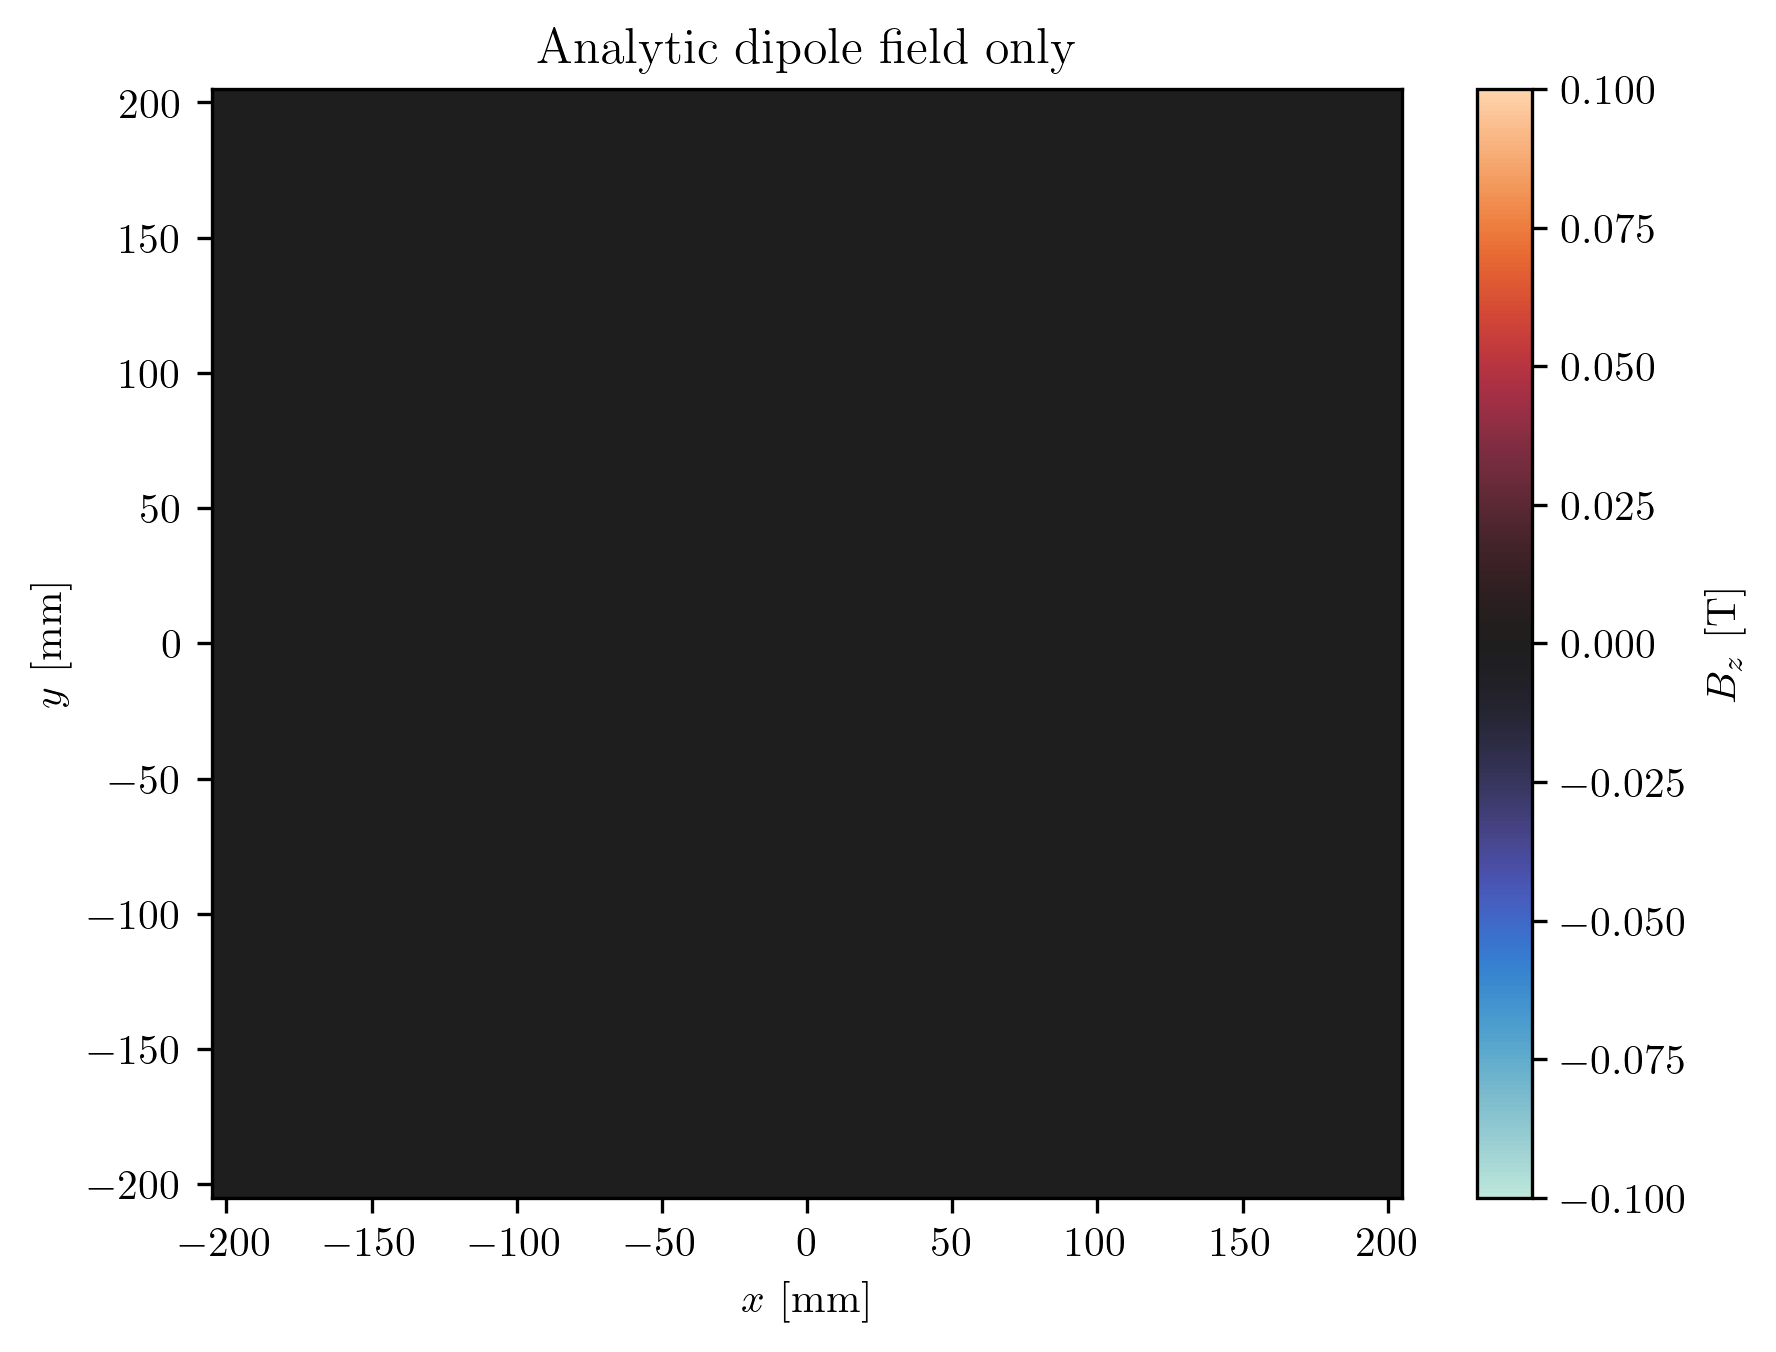

In [5]:
########## B_z ##########

Bz_pivot = data_slice.pivot_table(index='y', columns='x', values='Bz')
Bz_grid = Bz_pivot.values

fig, ax = plt.subplots()
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_grid, cmap=cmap)
plt.colorbar(pcm, label='$B_z$ [T]')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('Analytic dipole field only')
plt.show()

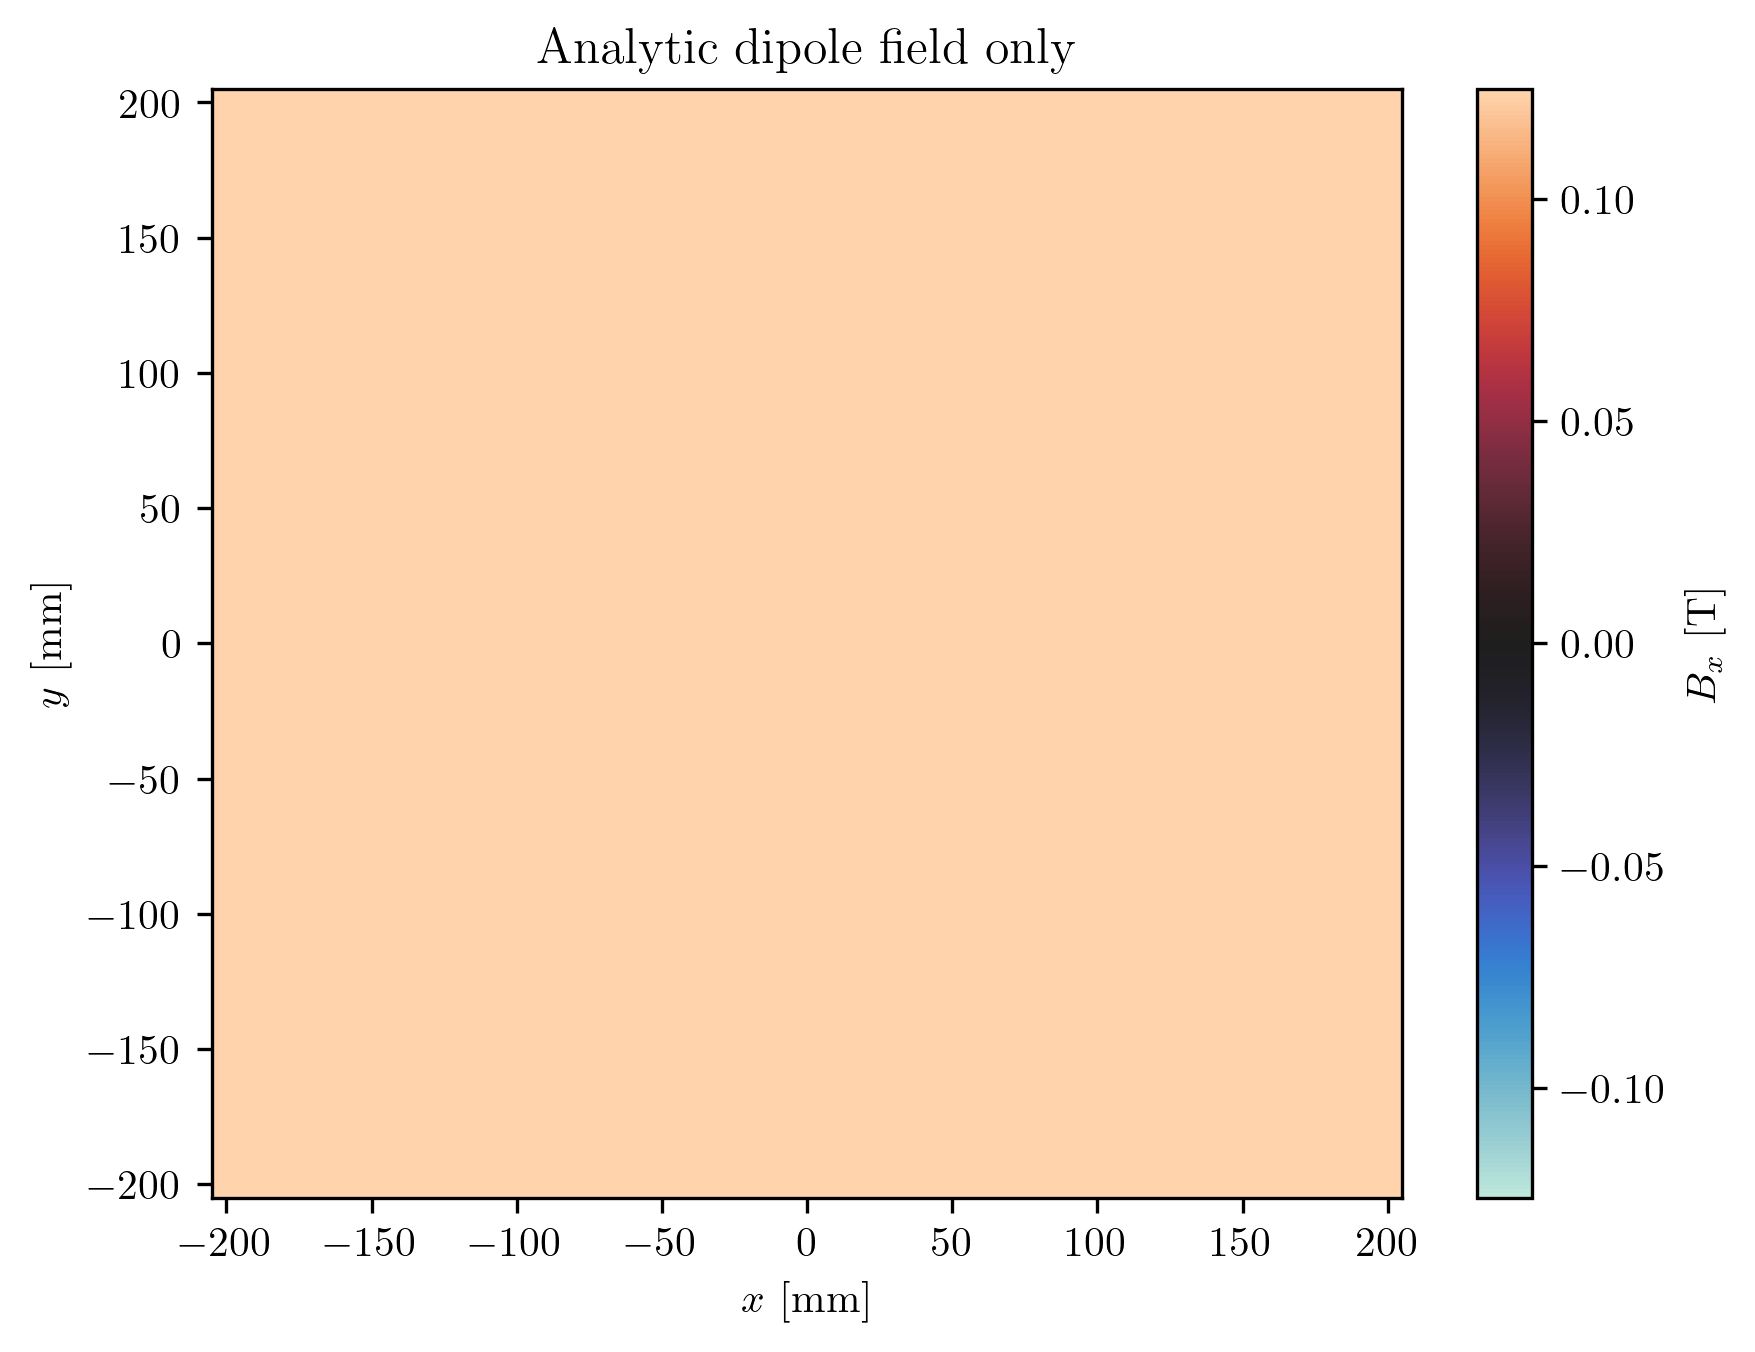

In [6]:
########## B_x ##########

Bx_pivot = data_slice.pivot_table(index='y', columns='x', values='Bx')
Bx_grid = Bx_pivot.values

fig, ax = plt.subplots()
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_grid, cmap=cmap, vmin=-np.max(Bx_grid), vmax=np.max(Bx_grid))
plt.colorbar(pcm, label='$B_x$ [T]')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('Analytic dipole field only')
plt.show()

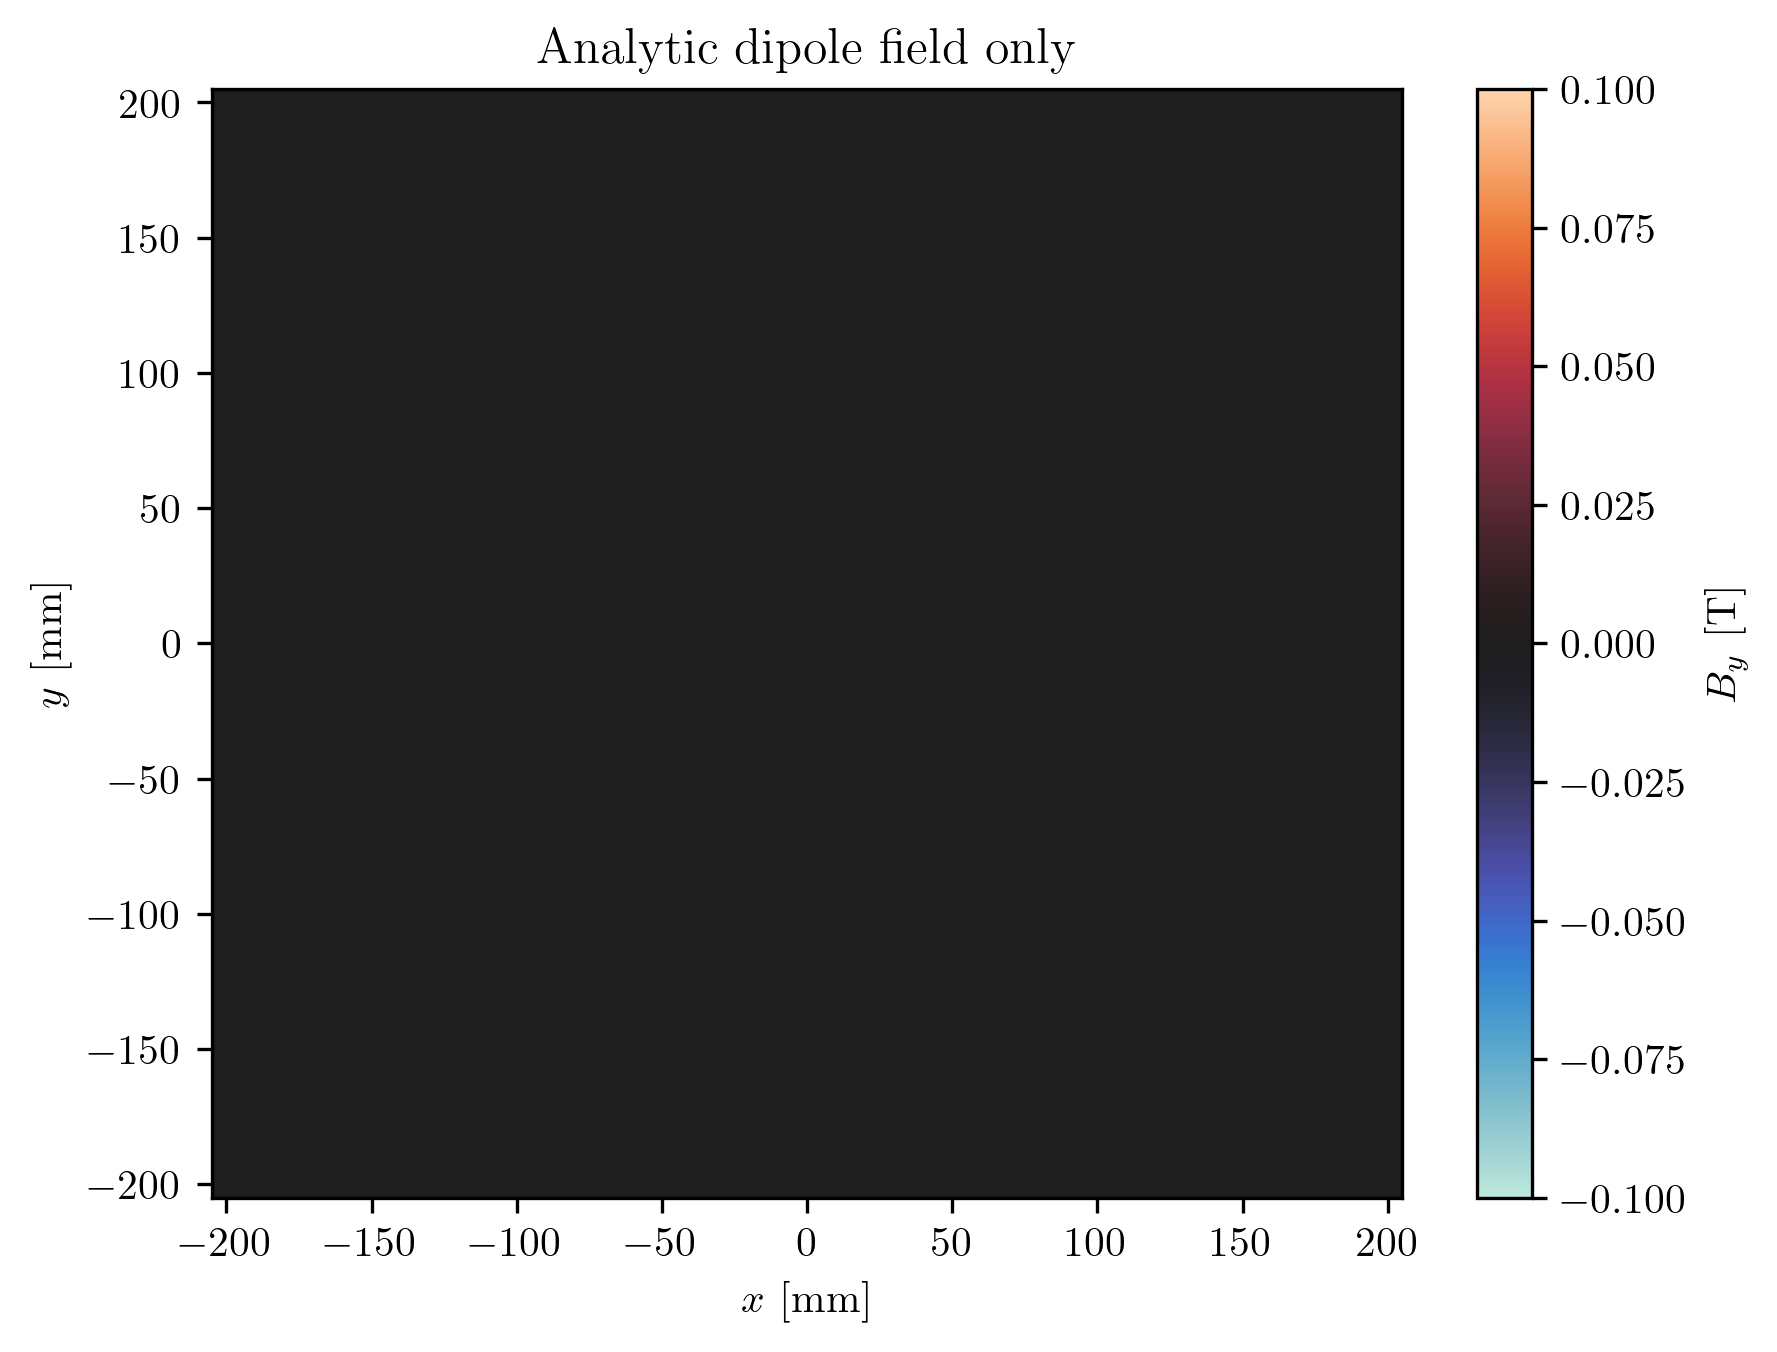

In [7]:
########## B_y ##########

By_pivot = data_slice.pivot_table(index='y', columns='x', values='By')
By_grid = By_pivot.values

fig, ax = plt.subplots()
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_grid, cmap=cmap)
plt.colorbar(pcm, label='$B_y$ [T]')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('Analytic dipole field only')
plt.show()

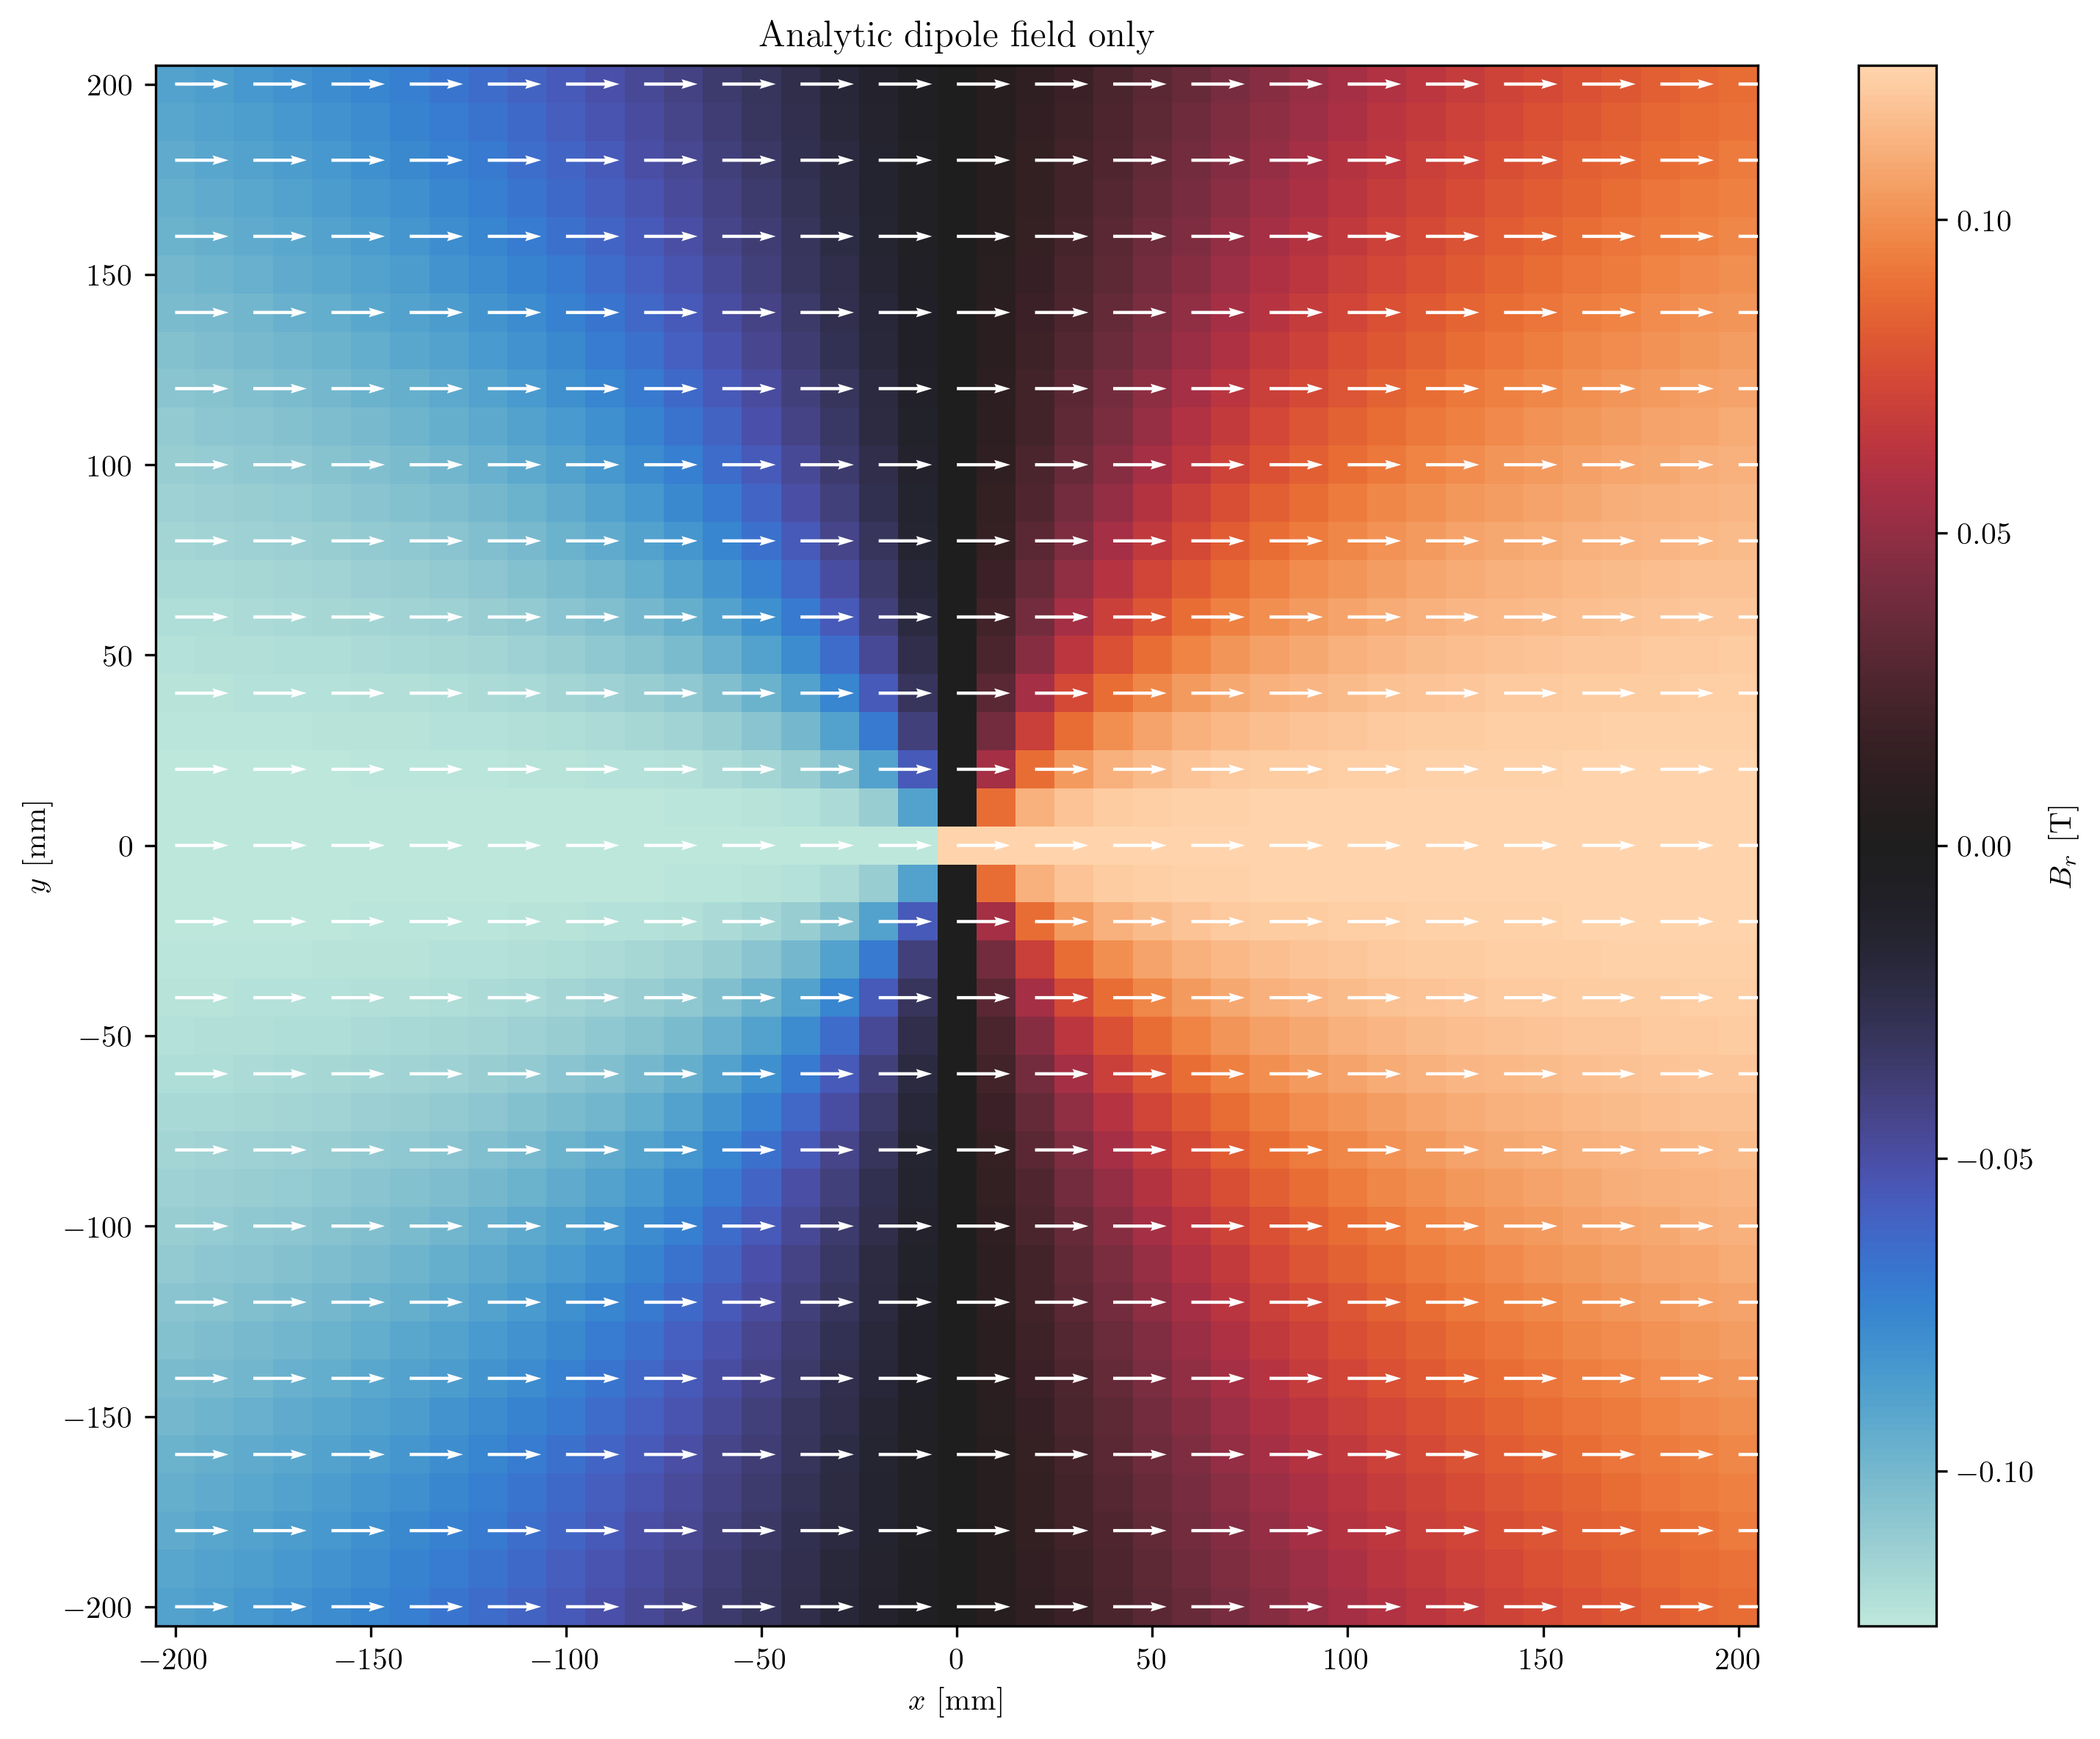

In [8]:
########## VECTOR PLOT OF TRANSVERSE FIELD ##########

Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values

step = 2
X_ds = X[::step, ::step]
Y_ds = Y[::step, ::step]
Bx_ds = Bx_grid[::step, ::step]
By_ds = By_grid[::step, ::step]

magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
Bx_norm = Bx_ds / (magnitude + 1e-12)
By_norm = By_ds / (magnitude + 1e-12)

fig, ax = plt.subplots(figsize=(10, 8))
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto', vmin=data_slice['Br'].min(), vmax=data_slice['Br'].max())
plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
plt.title('Analytic dipole field only')
plt.tight_layout()
plt.show()

### Animations of transverse slice along z

In [9]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

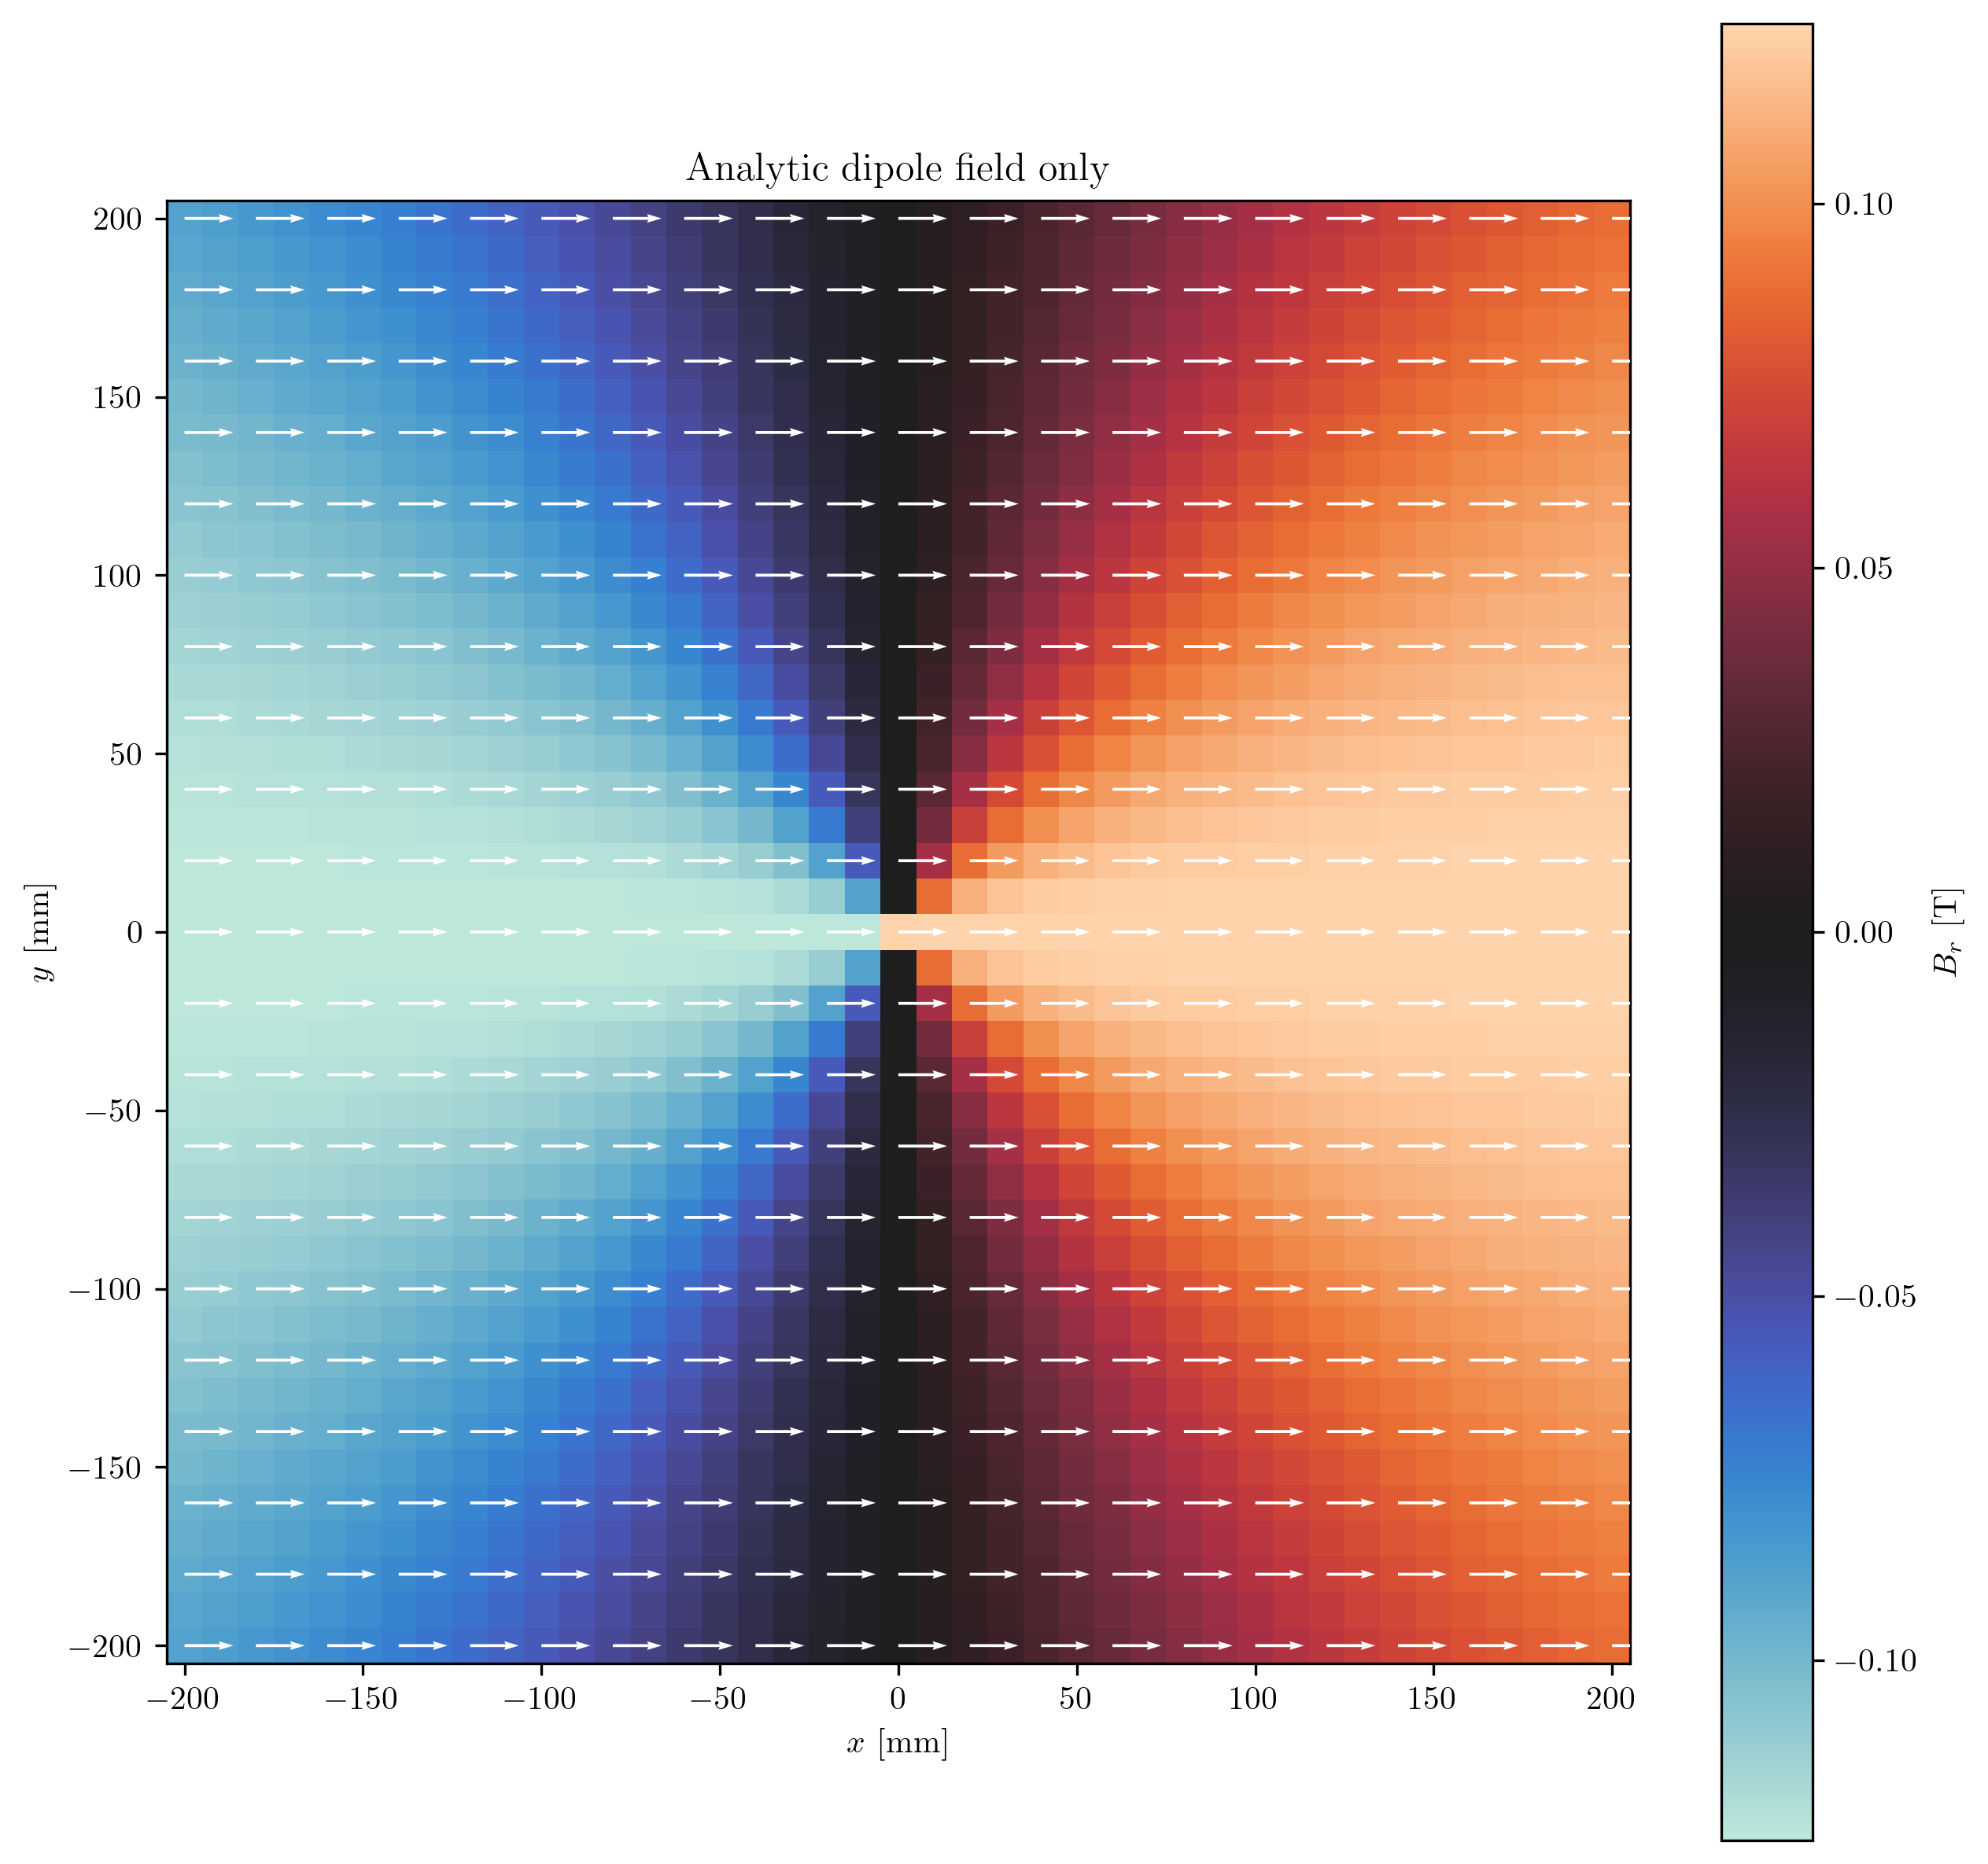

In [10]:
########## B_r QUIVER ANIMATION ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
ax.set_aspect('equal')
plt.title('Analytic dipole field only')

cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap)
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

quiver_plot = None

step = 2

def animate(frame):
    global quiver_plot

    z_val = unique_z[frame]

    data_slice = data[data['z'] == z_val]

    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values

    X_ds = X[::step, ::step]
    Y_ds = Y[::step, ::step]
    Bx_ds = Bx_grid[::step, ::step]
    By_ds = By_grid[::step, ::step]

    magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
    Bx_norm = Bx_ds / (magnitude + 1e-12)
    By_norm = By_ds / (magnitude + 1e-12)

    pcm.set_array(Br_grid.ravel())

    if quiver_plot:
        quiver_plot.remove()

    quiver_plot = ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

    return [pcm, quiver_plot]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_dipole.gif', writer='pillow')

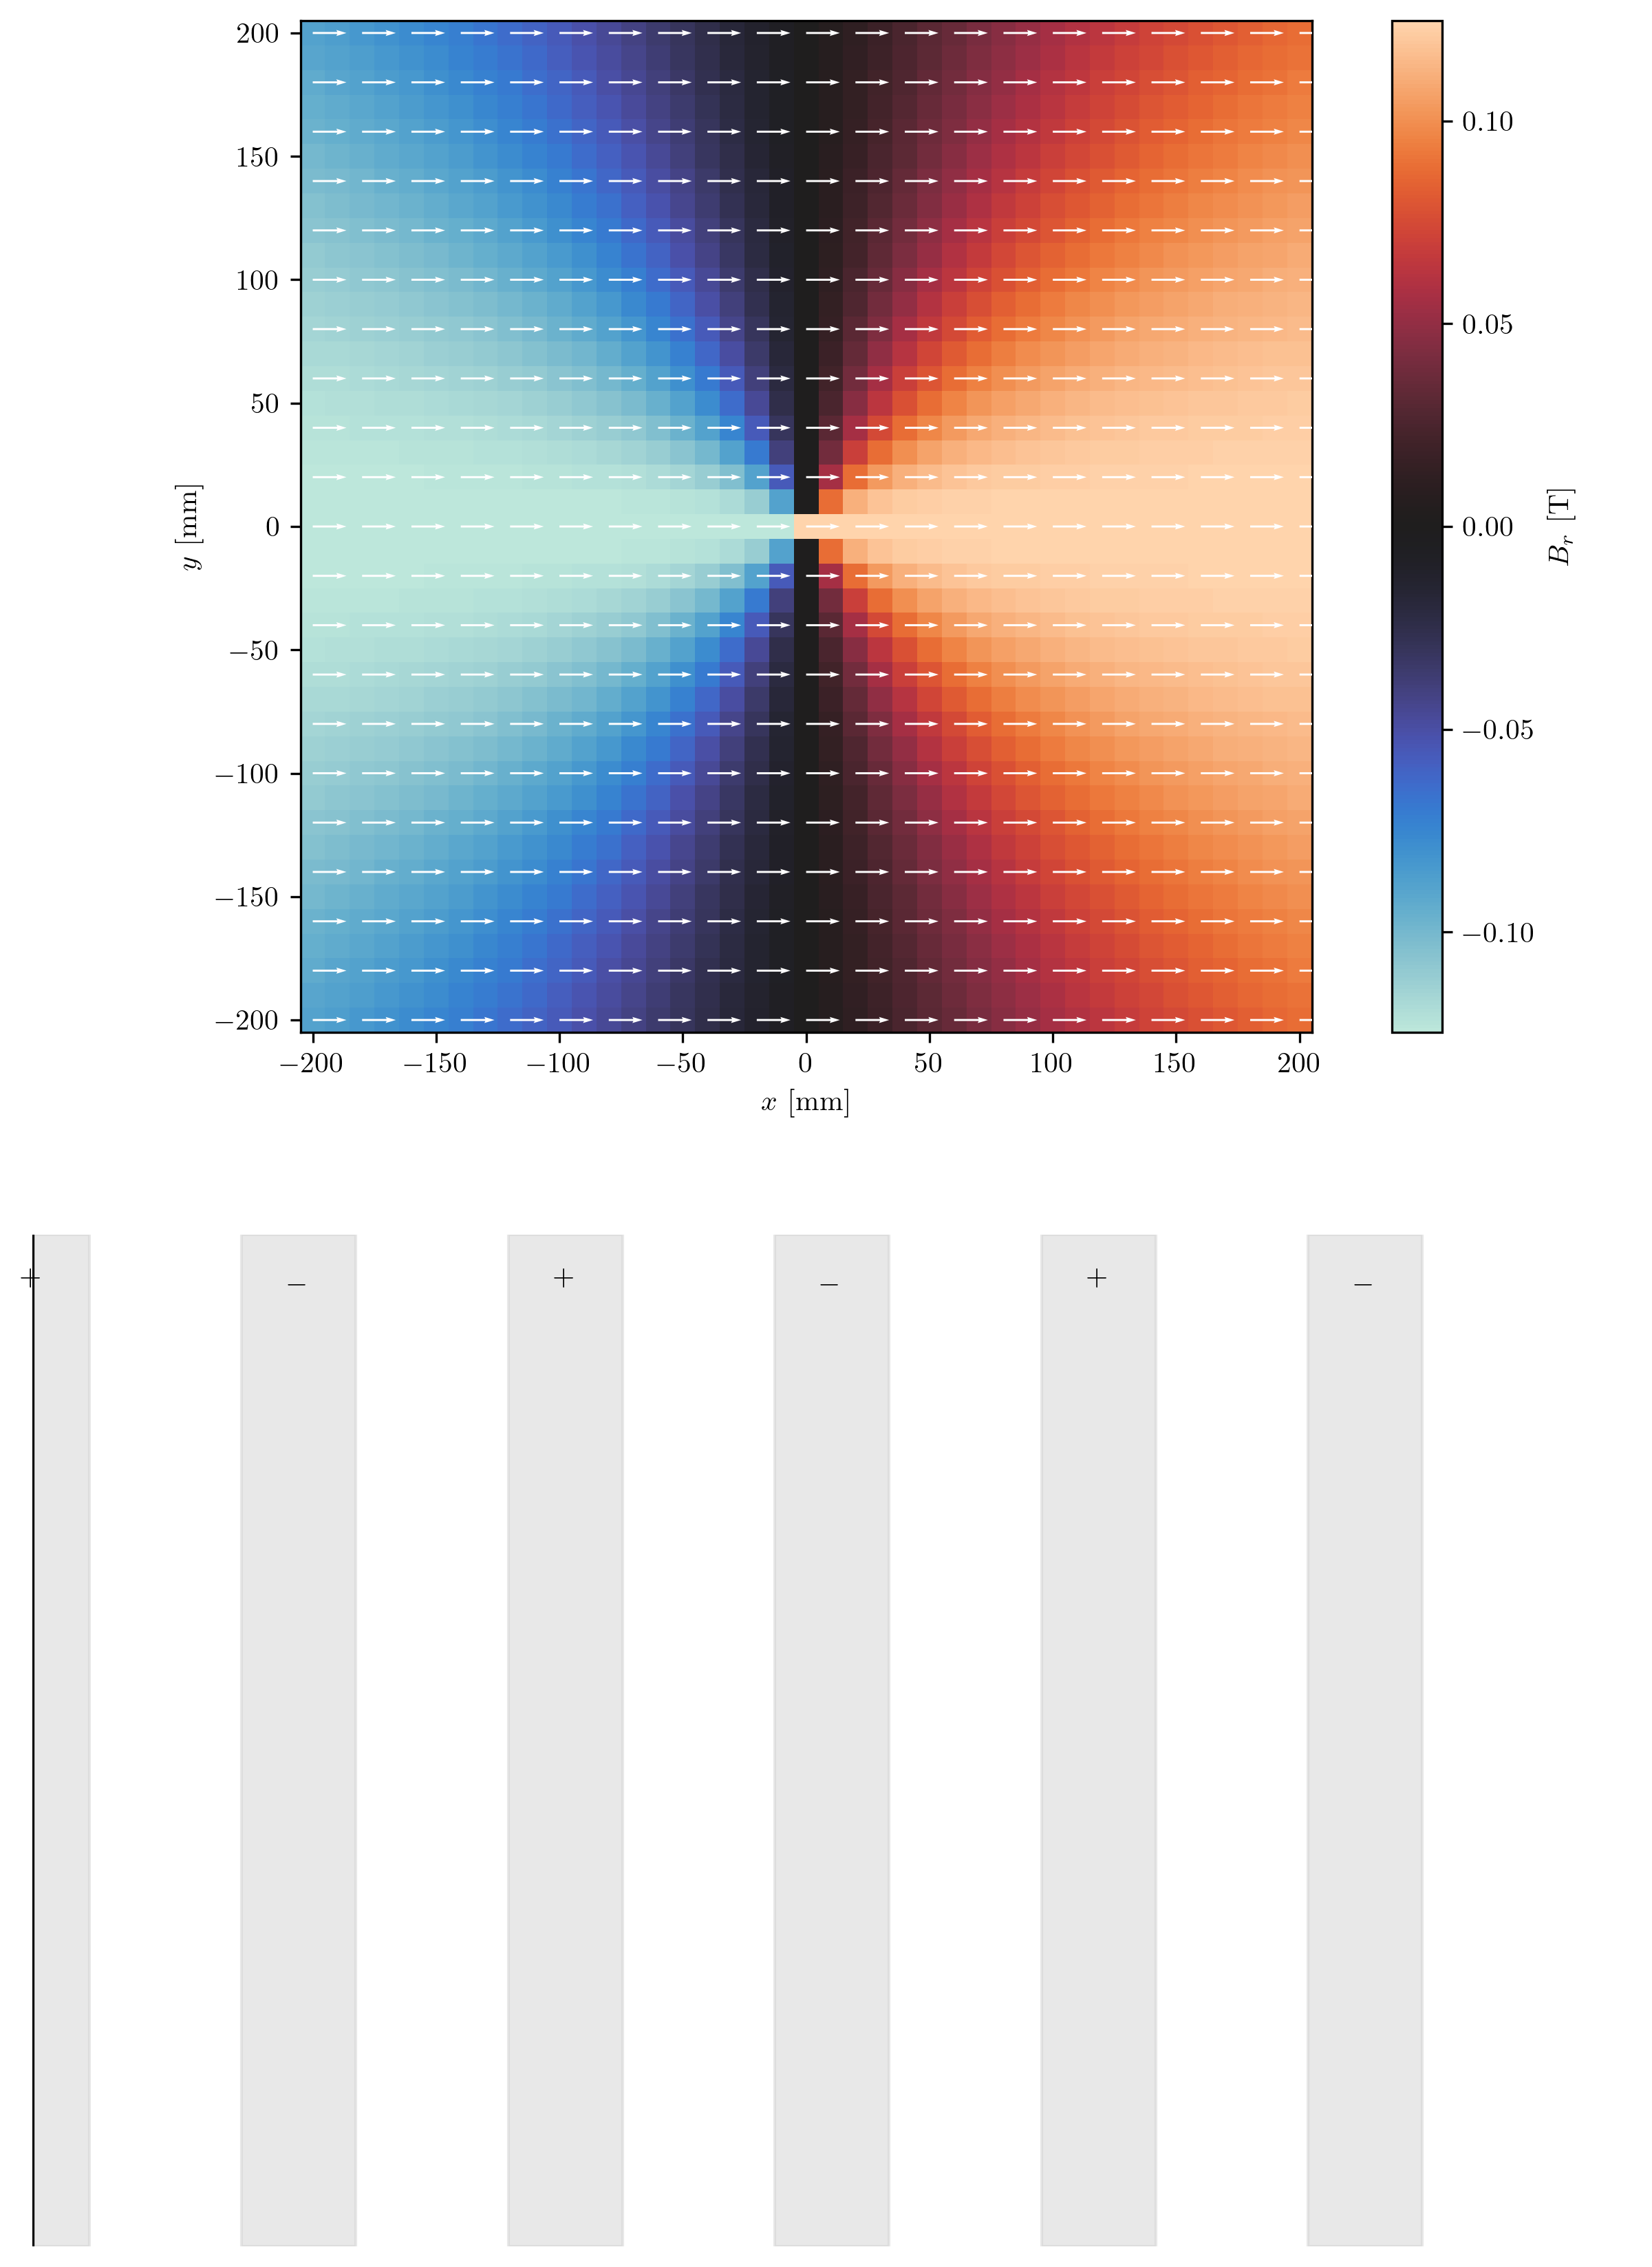

In [11]:
########## B_r QUIVER ANIMATION WITH LATTICE ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, axs = plt.subplots(2, 1, figsize=(10,14))
ax, ax2 = axs[0], axs[1]

arrayy = [0, 0]
ax2.set_xlim(0, 4200)
plot_lattice(ax2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
ax.set_aspect('equal')

cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap)
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

quiver_plot = None

step = 2

def animate(frame):
    global quiver_plot

    z_val = unique_z[frame]
    vline.set_xdata([z_val])

    data_slice = data[data['z'] == z_val]

    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values

    X_ds = X[::step, ::step]
    Y_ds = Y[::step, ::step]
    Bx_ds = Bx_grid[::step, ::step]
    By_ds = By_grid[::step, ::step]

    magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
    Bx_norm = Bx_ds / (magnitude + 1e-12)
    By_norm = By_ds / (magnitude + 1e-12)

    pcm.set_array(Br_grid.ravel())

    if quiver_plot:
        quiver_plot.remove()

    quiver_plot = ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

    return [pcm, vline, quiver_plot]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_dipole_lattice.gif', writer='pillow')

## Dipole + solenoids

In [12]:
# Read in field map files:
data = readFieldMapData('fieldmap_withsolenoids.txt')

### Plot transverse slice at given z

In [13]:
z_val = 0.0

data_slice = data[data['z'] == z_val]

x_unique = np.sort(data_slice['x'].unique())
y_unique = np.sort(data_slice['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

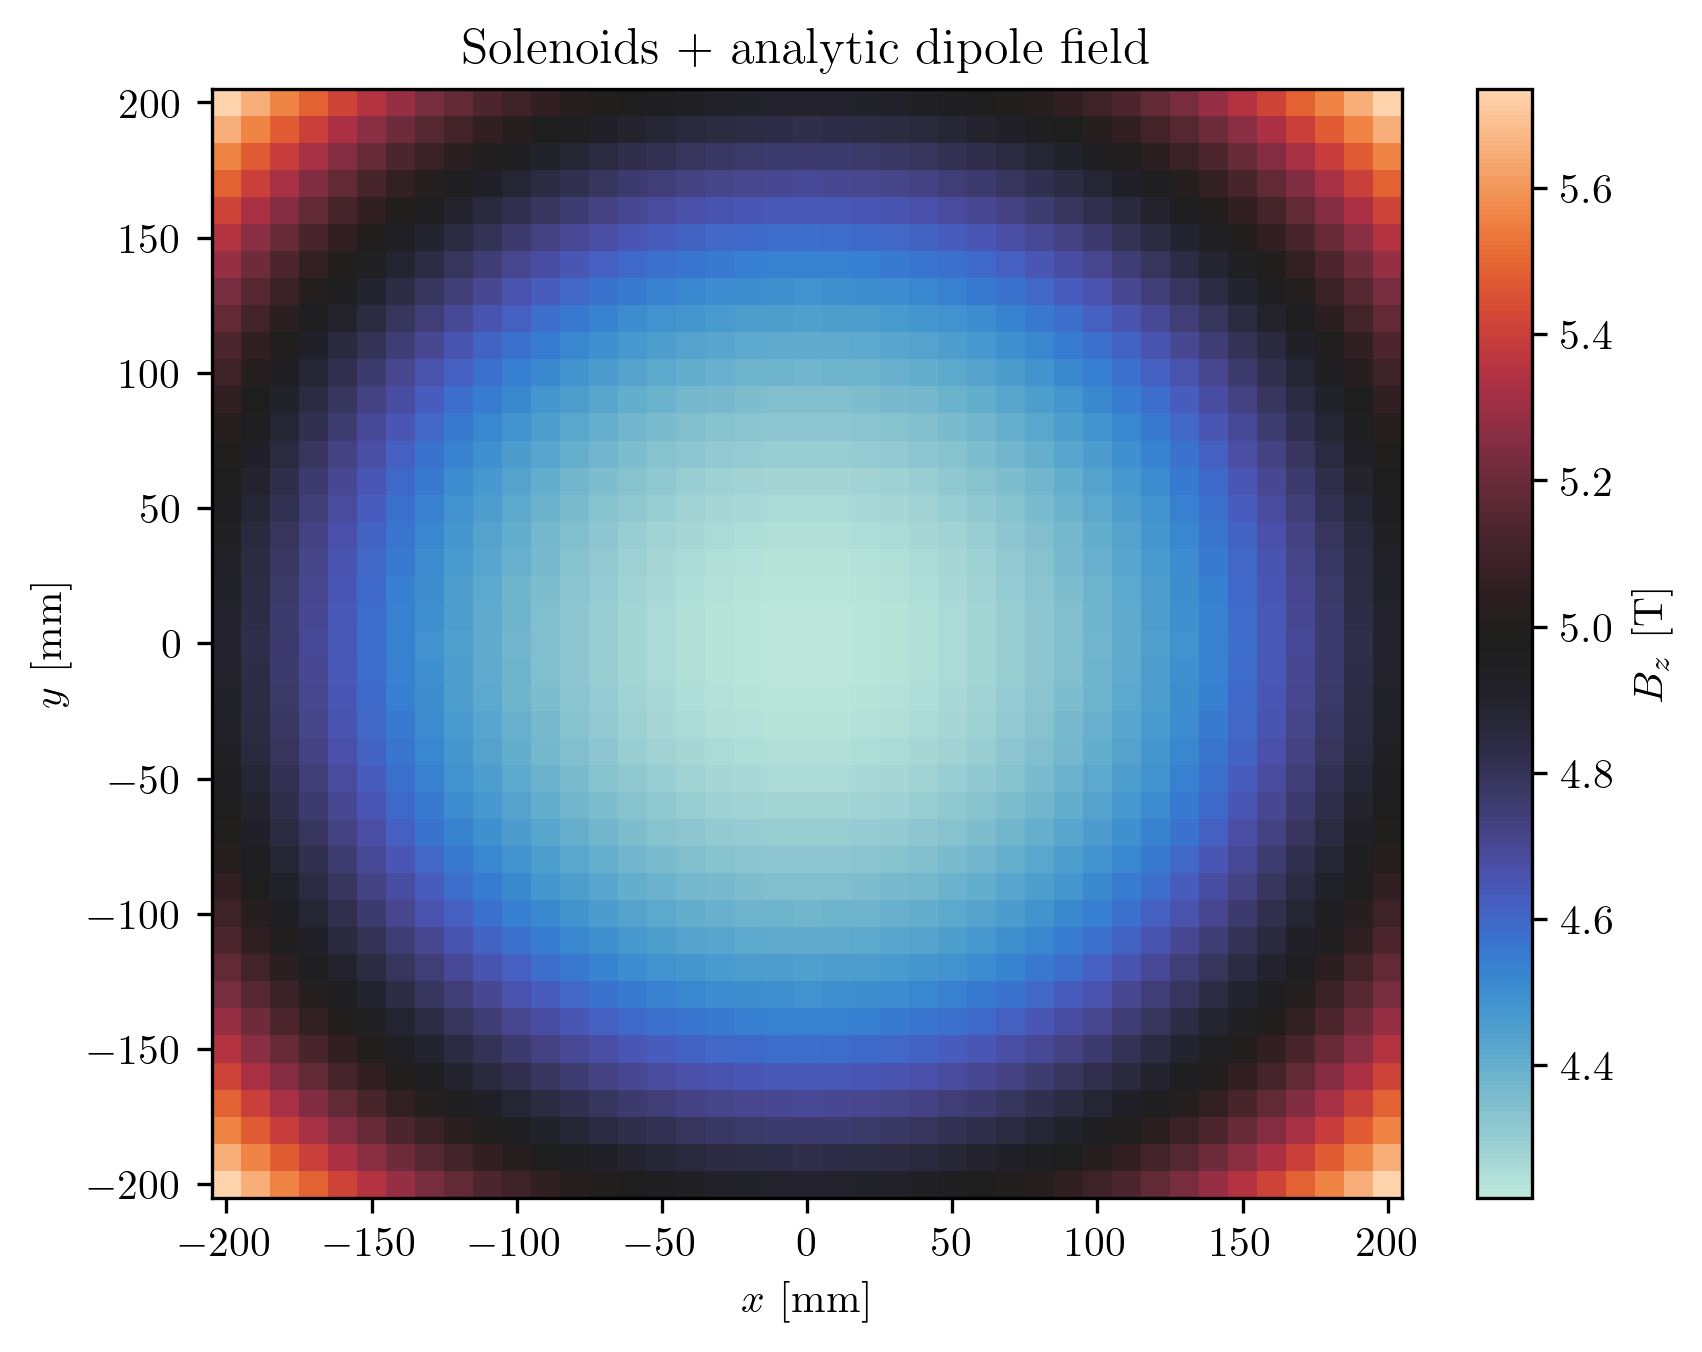

In [14]:
########## B_z ##########

Bz_pivot = data_slice.pivot_table(index='y', columns='x', values='Bz')
Bz_grid = Bz_pivot.values

fig, ax = plt.subplots()
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_grid, cmap=cmap)
plt.colorbar(pcm, label='$B_z$ [T]')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('Solenoids + analytic dipole field')
plt.show()

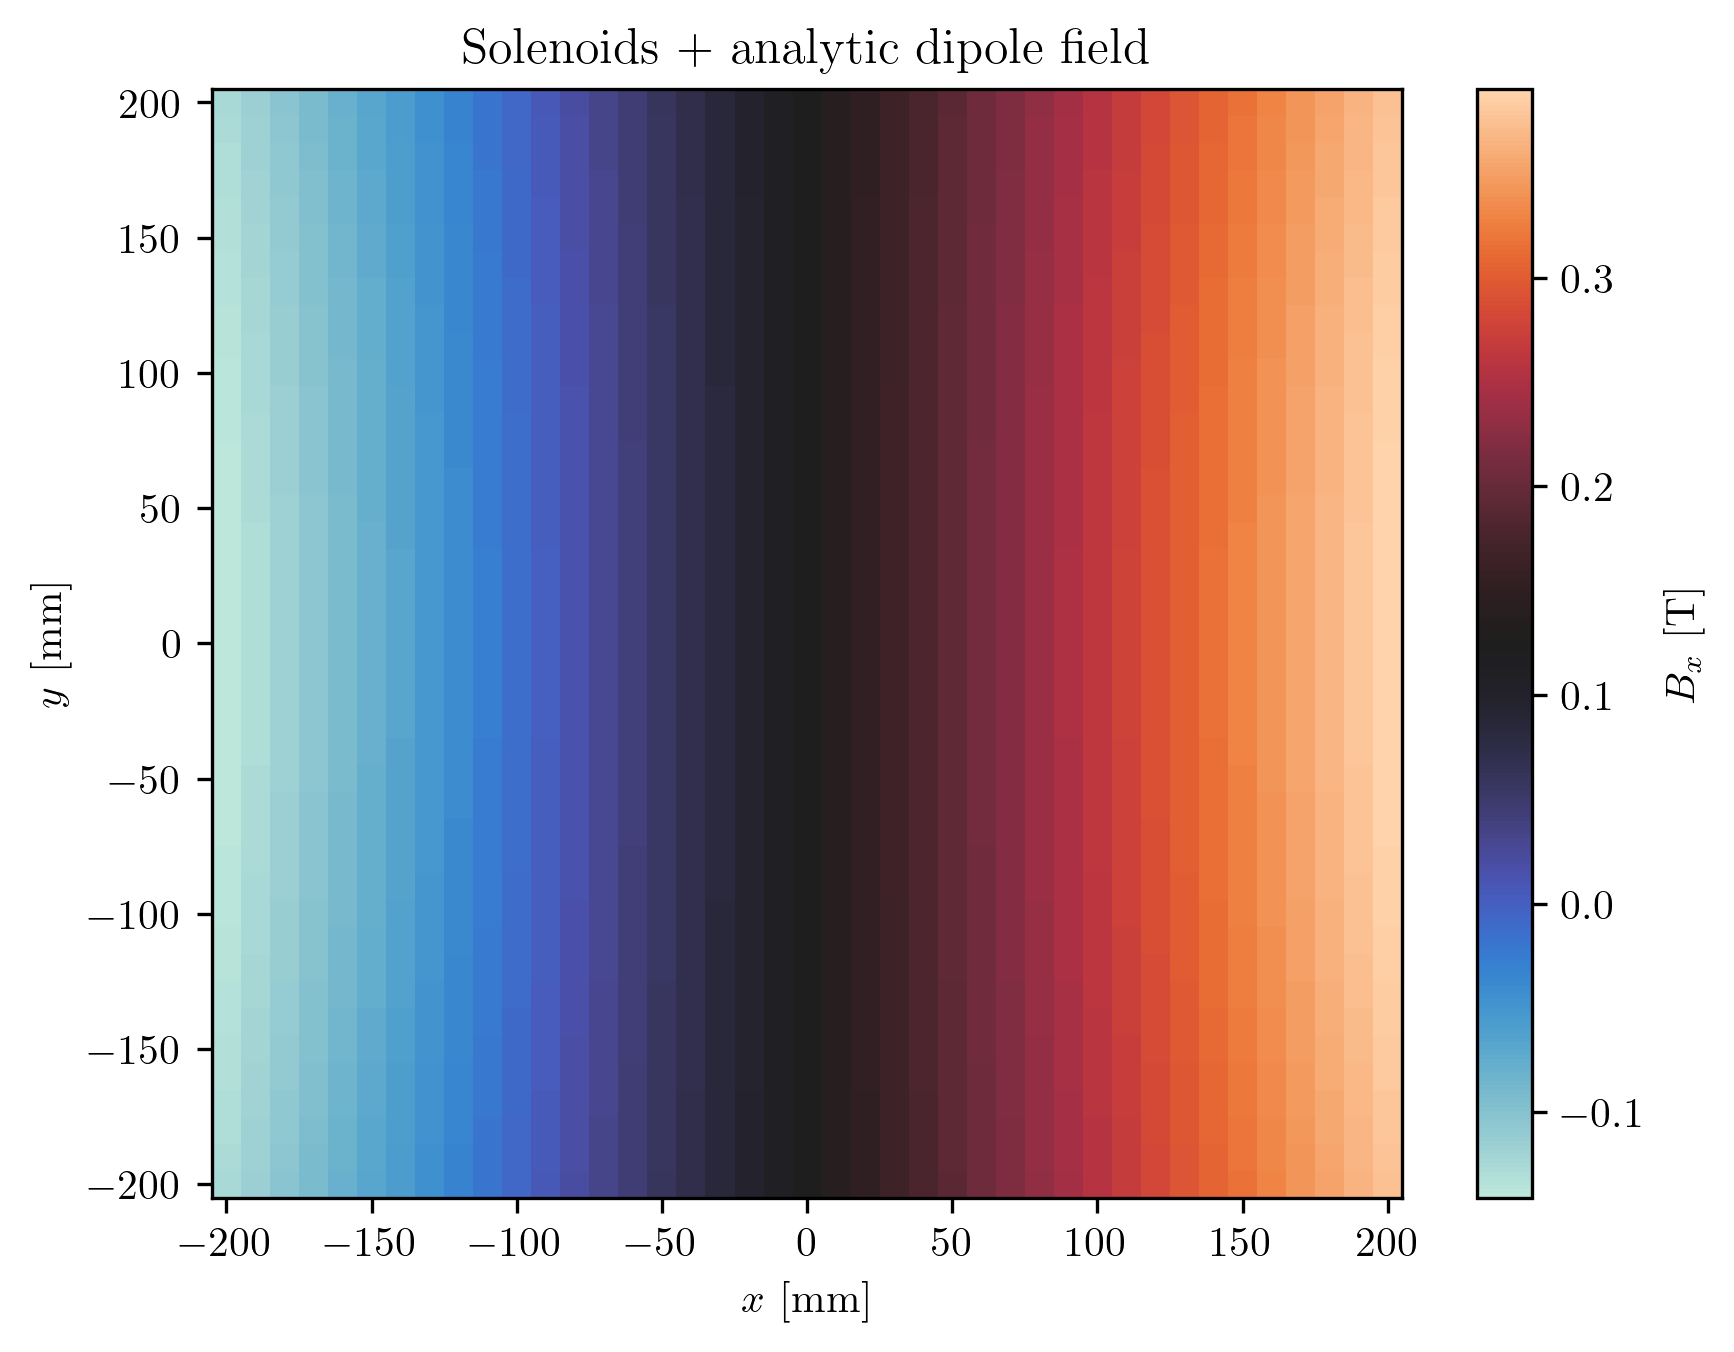

In [15]:
########## B_x ##########

Bx_pivot = data_slice.pivot_table(index='y', columns='x', values='Bx')
Bx_grid = Bx_pivot.values

fig, ax = plt.subplots()
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_grid, cmap=cmap)
plt.colorbar(pcm, label='$B_x$ [T]')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('Solenoids + analytic dipole field')
plt.show()

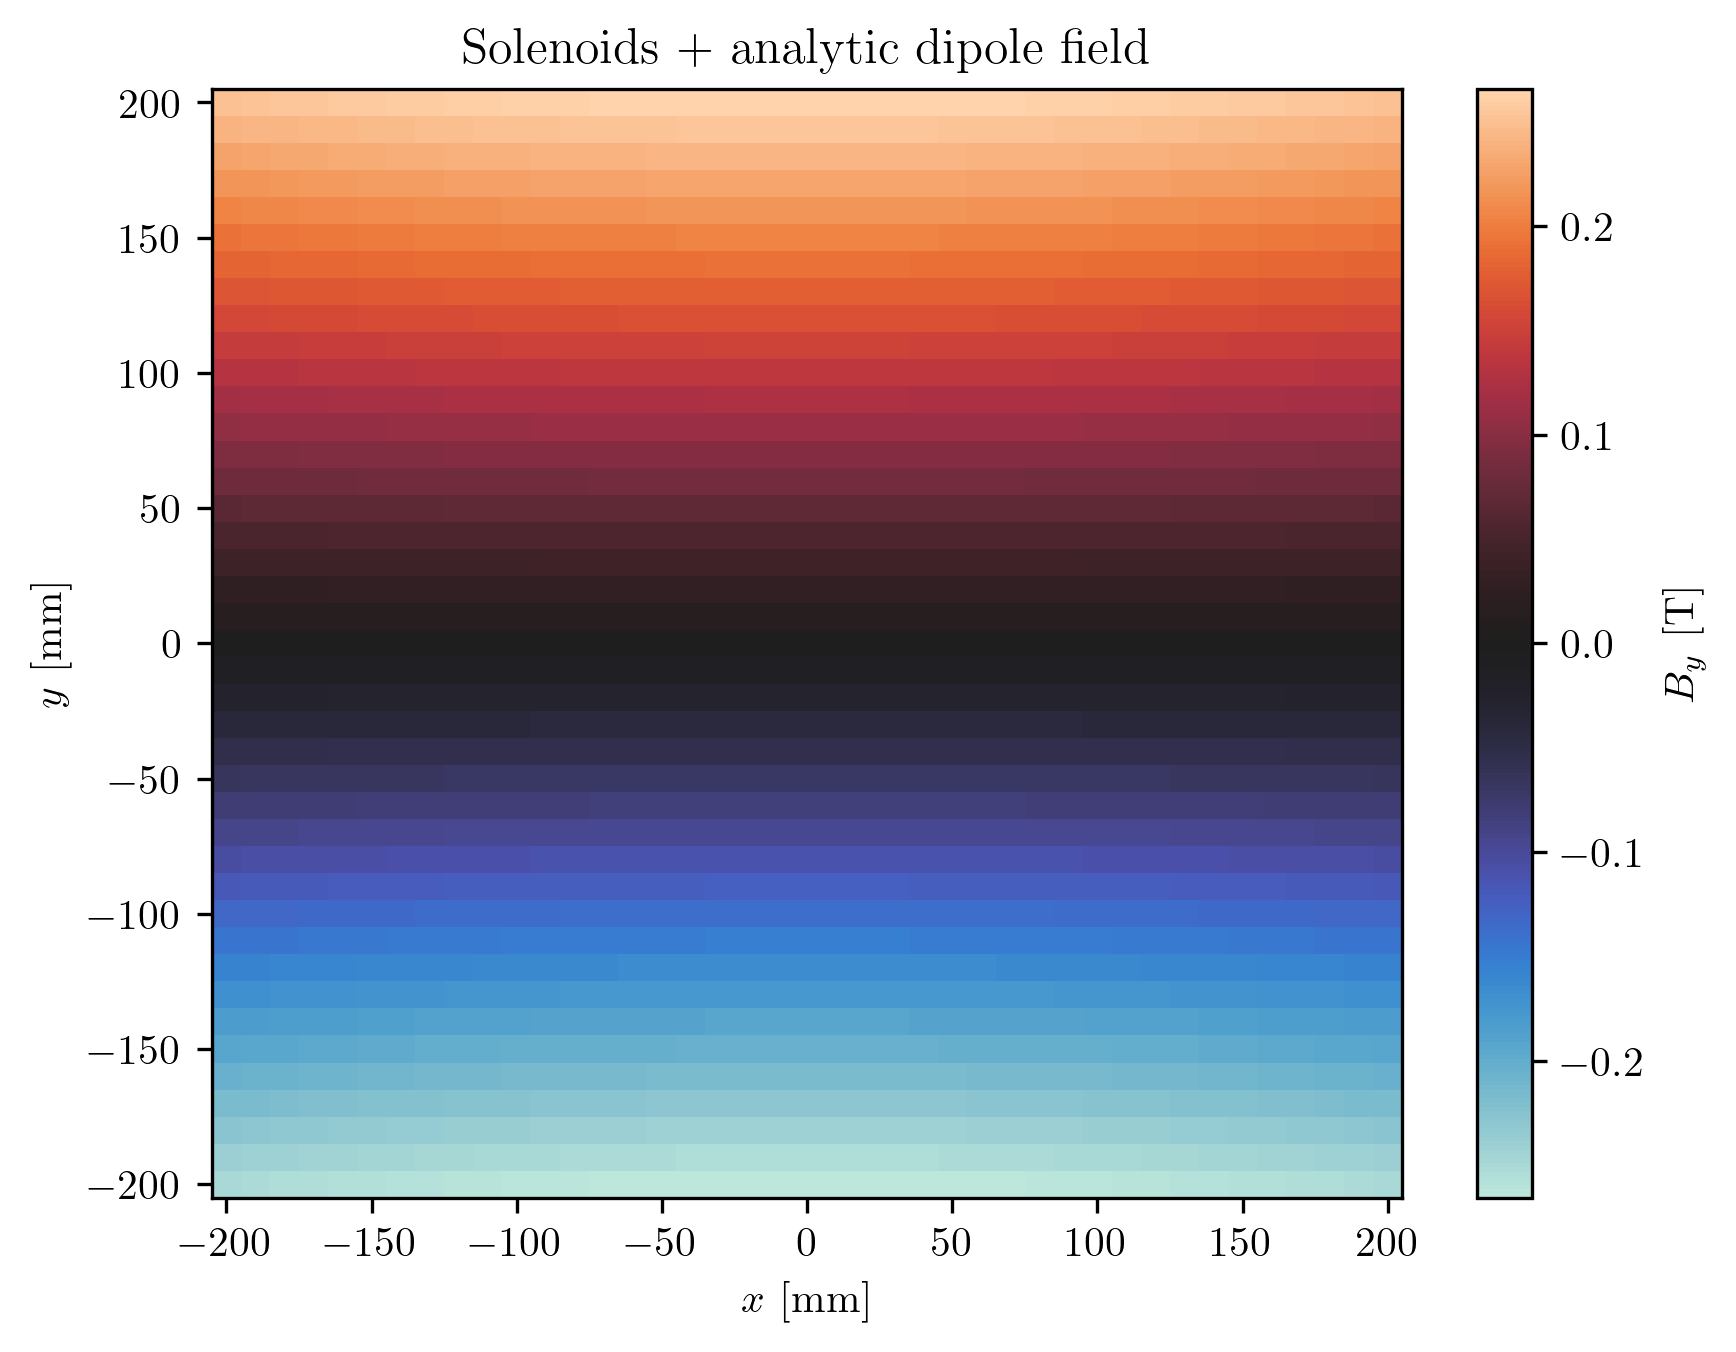

In [16]:
########## B_y ##########

By_pivot = data_slice.pivot_table(index='y', columns='x', values='By')
By_grid = By_pivot.values

fig, ax = plt.subplots()
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_grid, cmap=cmap)
plt.colorbar(pcm, label='$B_y$ [T]')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('Solenoids + analytic dipole field')
plt.show()

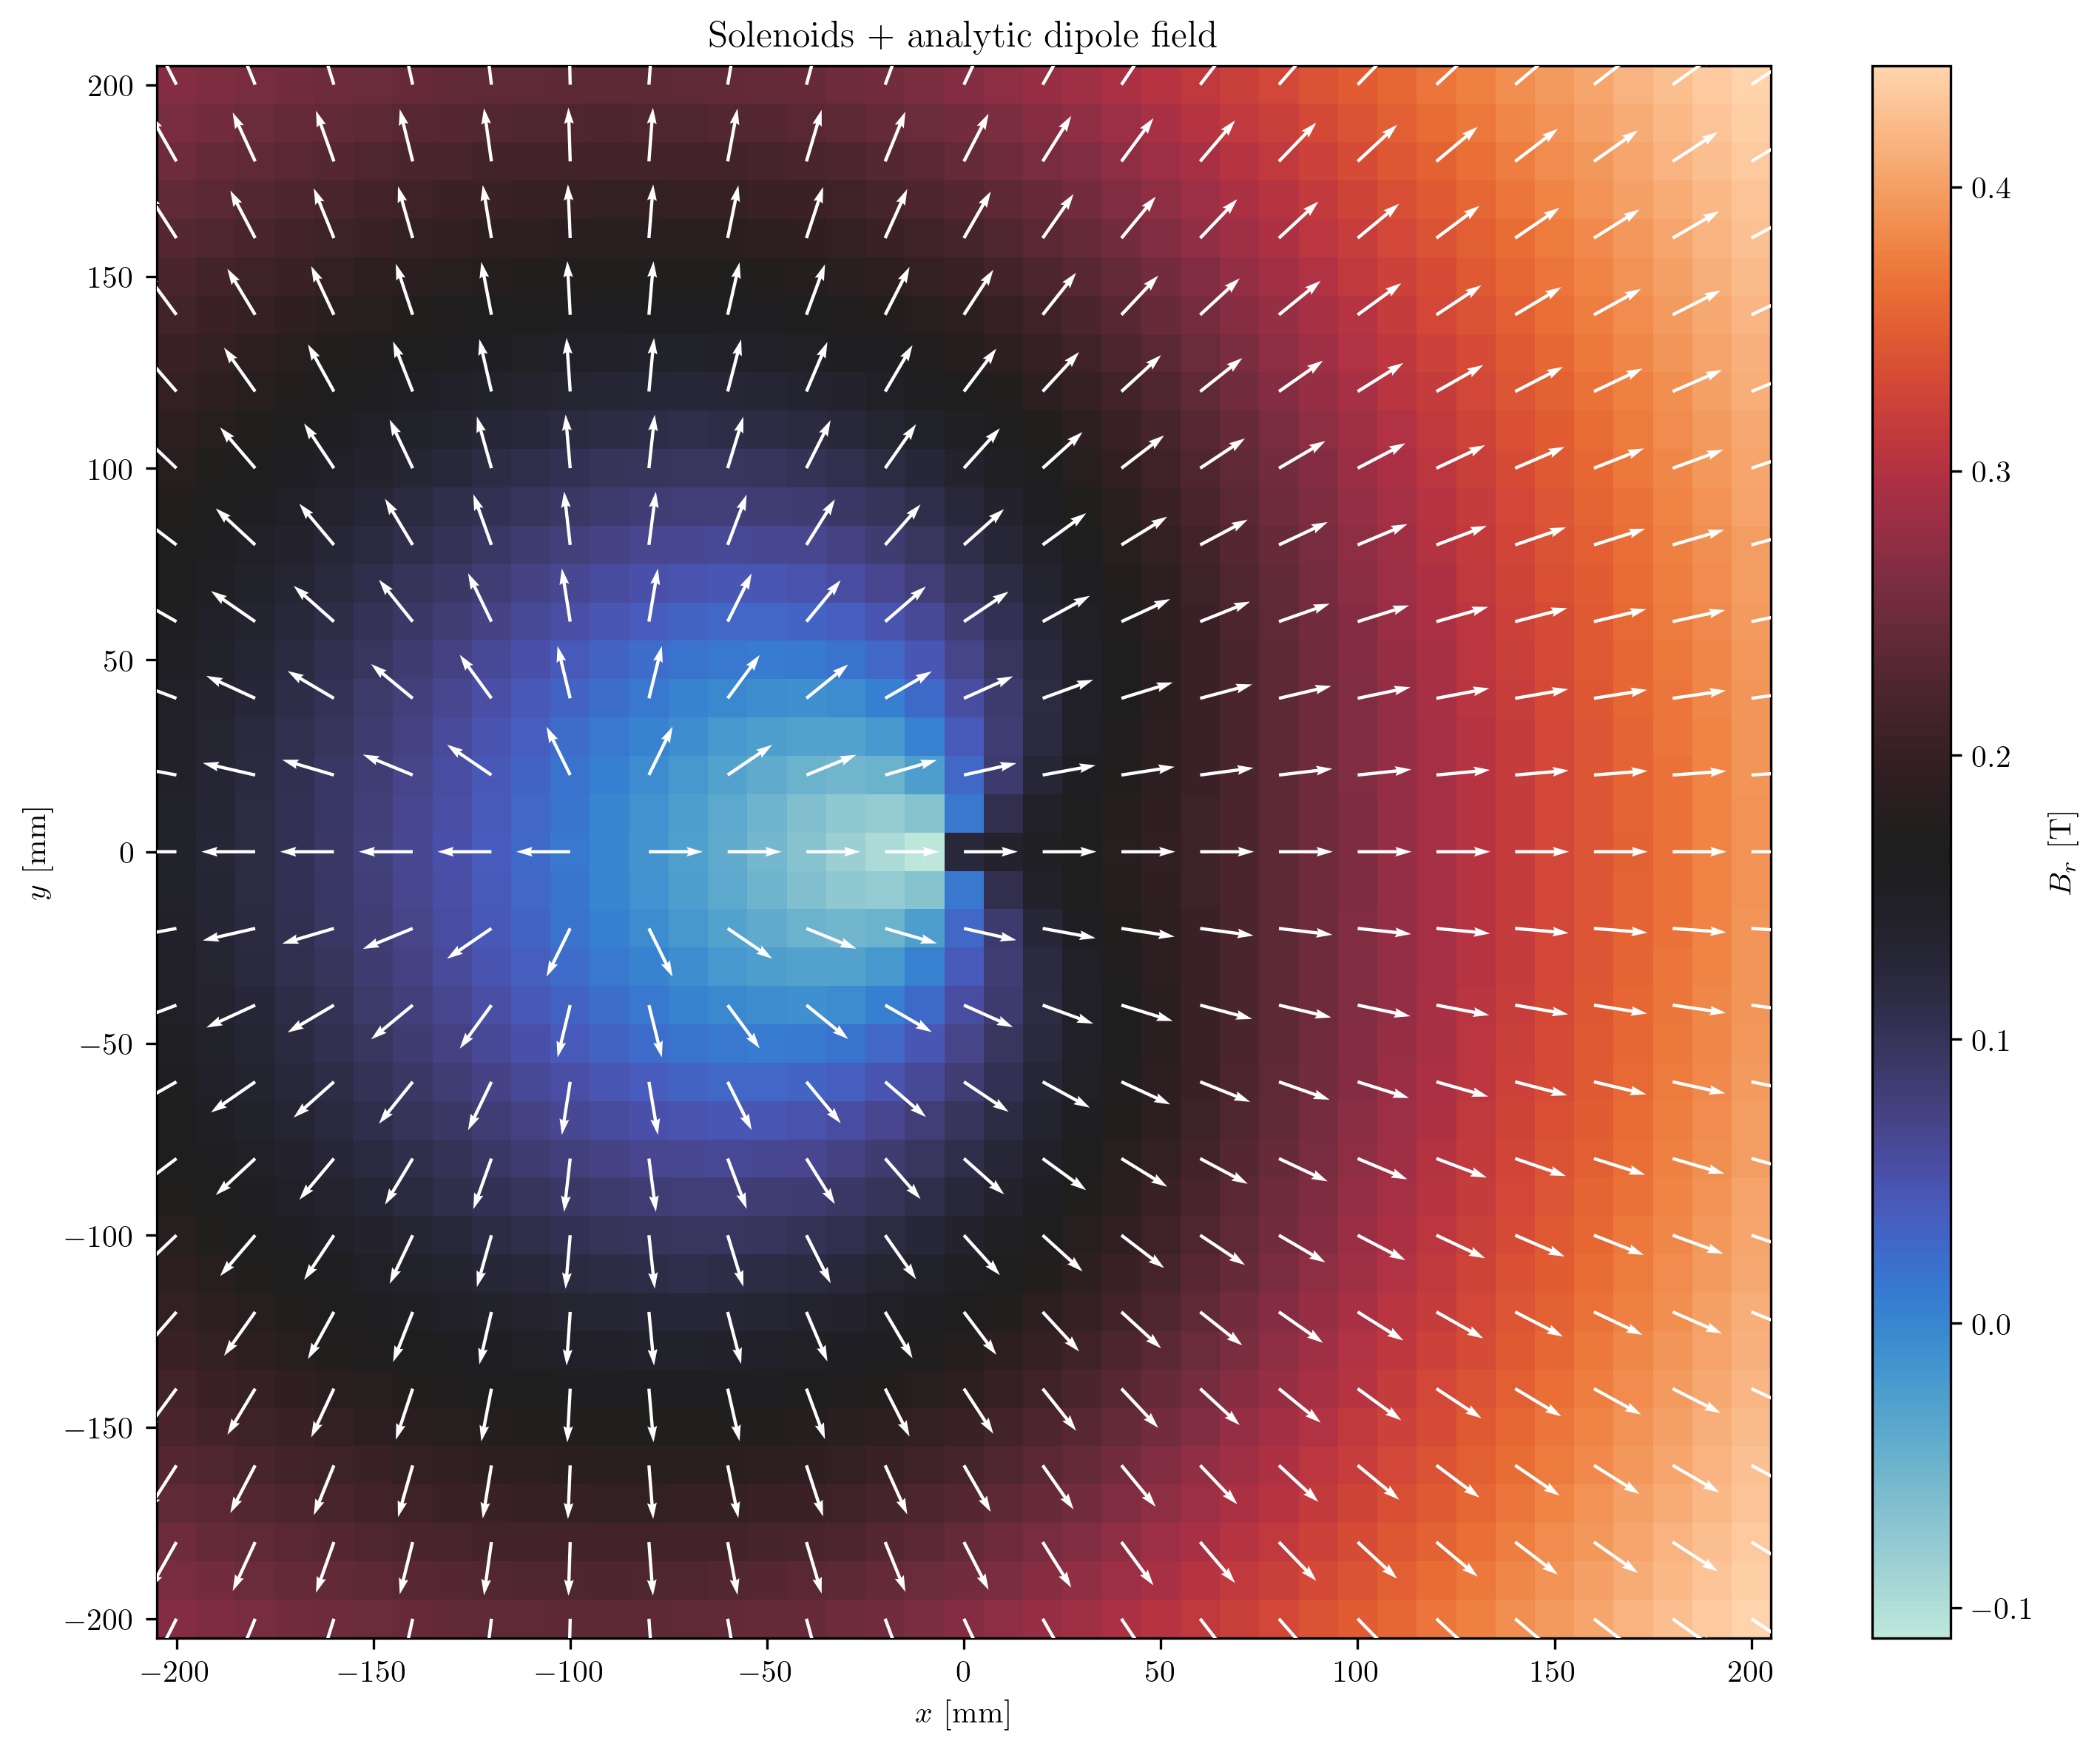

In [17]:
########## VECTOR PLOT OF TRANSVERSE FIELD ##########

Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values

step = 2
X_ds = X[::step, ::step]
Y_ds = Y[::step, ::step]
Bx_ds = Bx_grid[::step, ::step]
By_ds = By_grid[::step, ::step]

magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
Bx_norm = Bx_ds / (magnitude + 1e-12)
By_norm = By_ds / (magnitude + 1e-12)

fig, ax = plt.subplots(figsize=(10, 8))
# cmap = sns.diverging_palette(30, 270, l=65, center='dark', as_cmap=True)
cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto', vmin=data_slice['Br'].min(), vmax=data_slice['Br'].max())
plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
plt.title('Solenoids + analytic dipole field')
plt.tight_layout()
plt.show()

### Animations of transverse slice along z

In [18]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

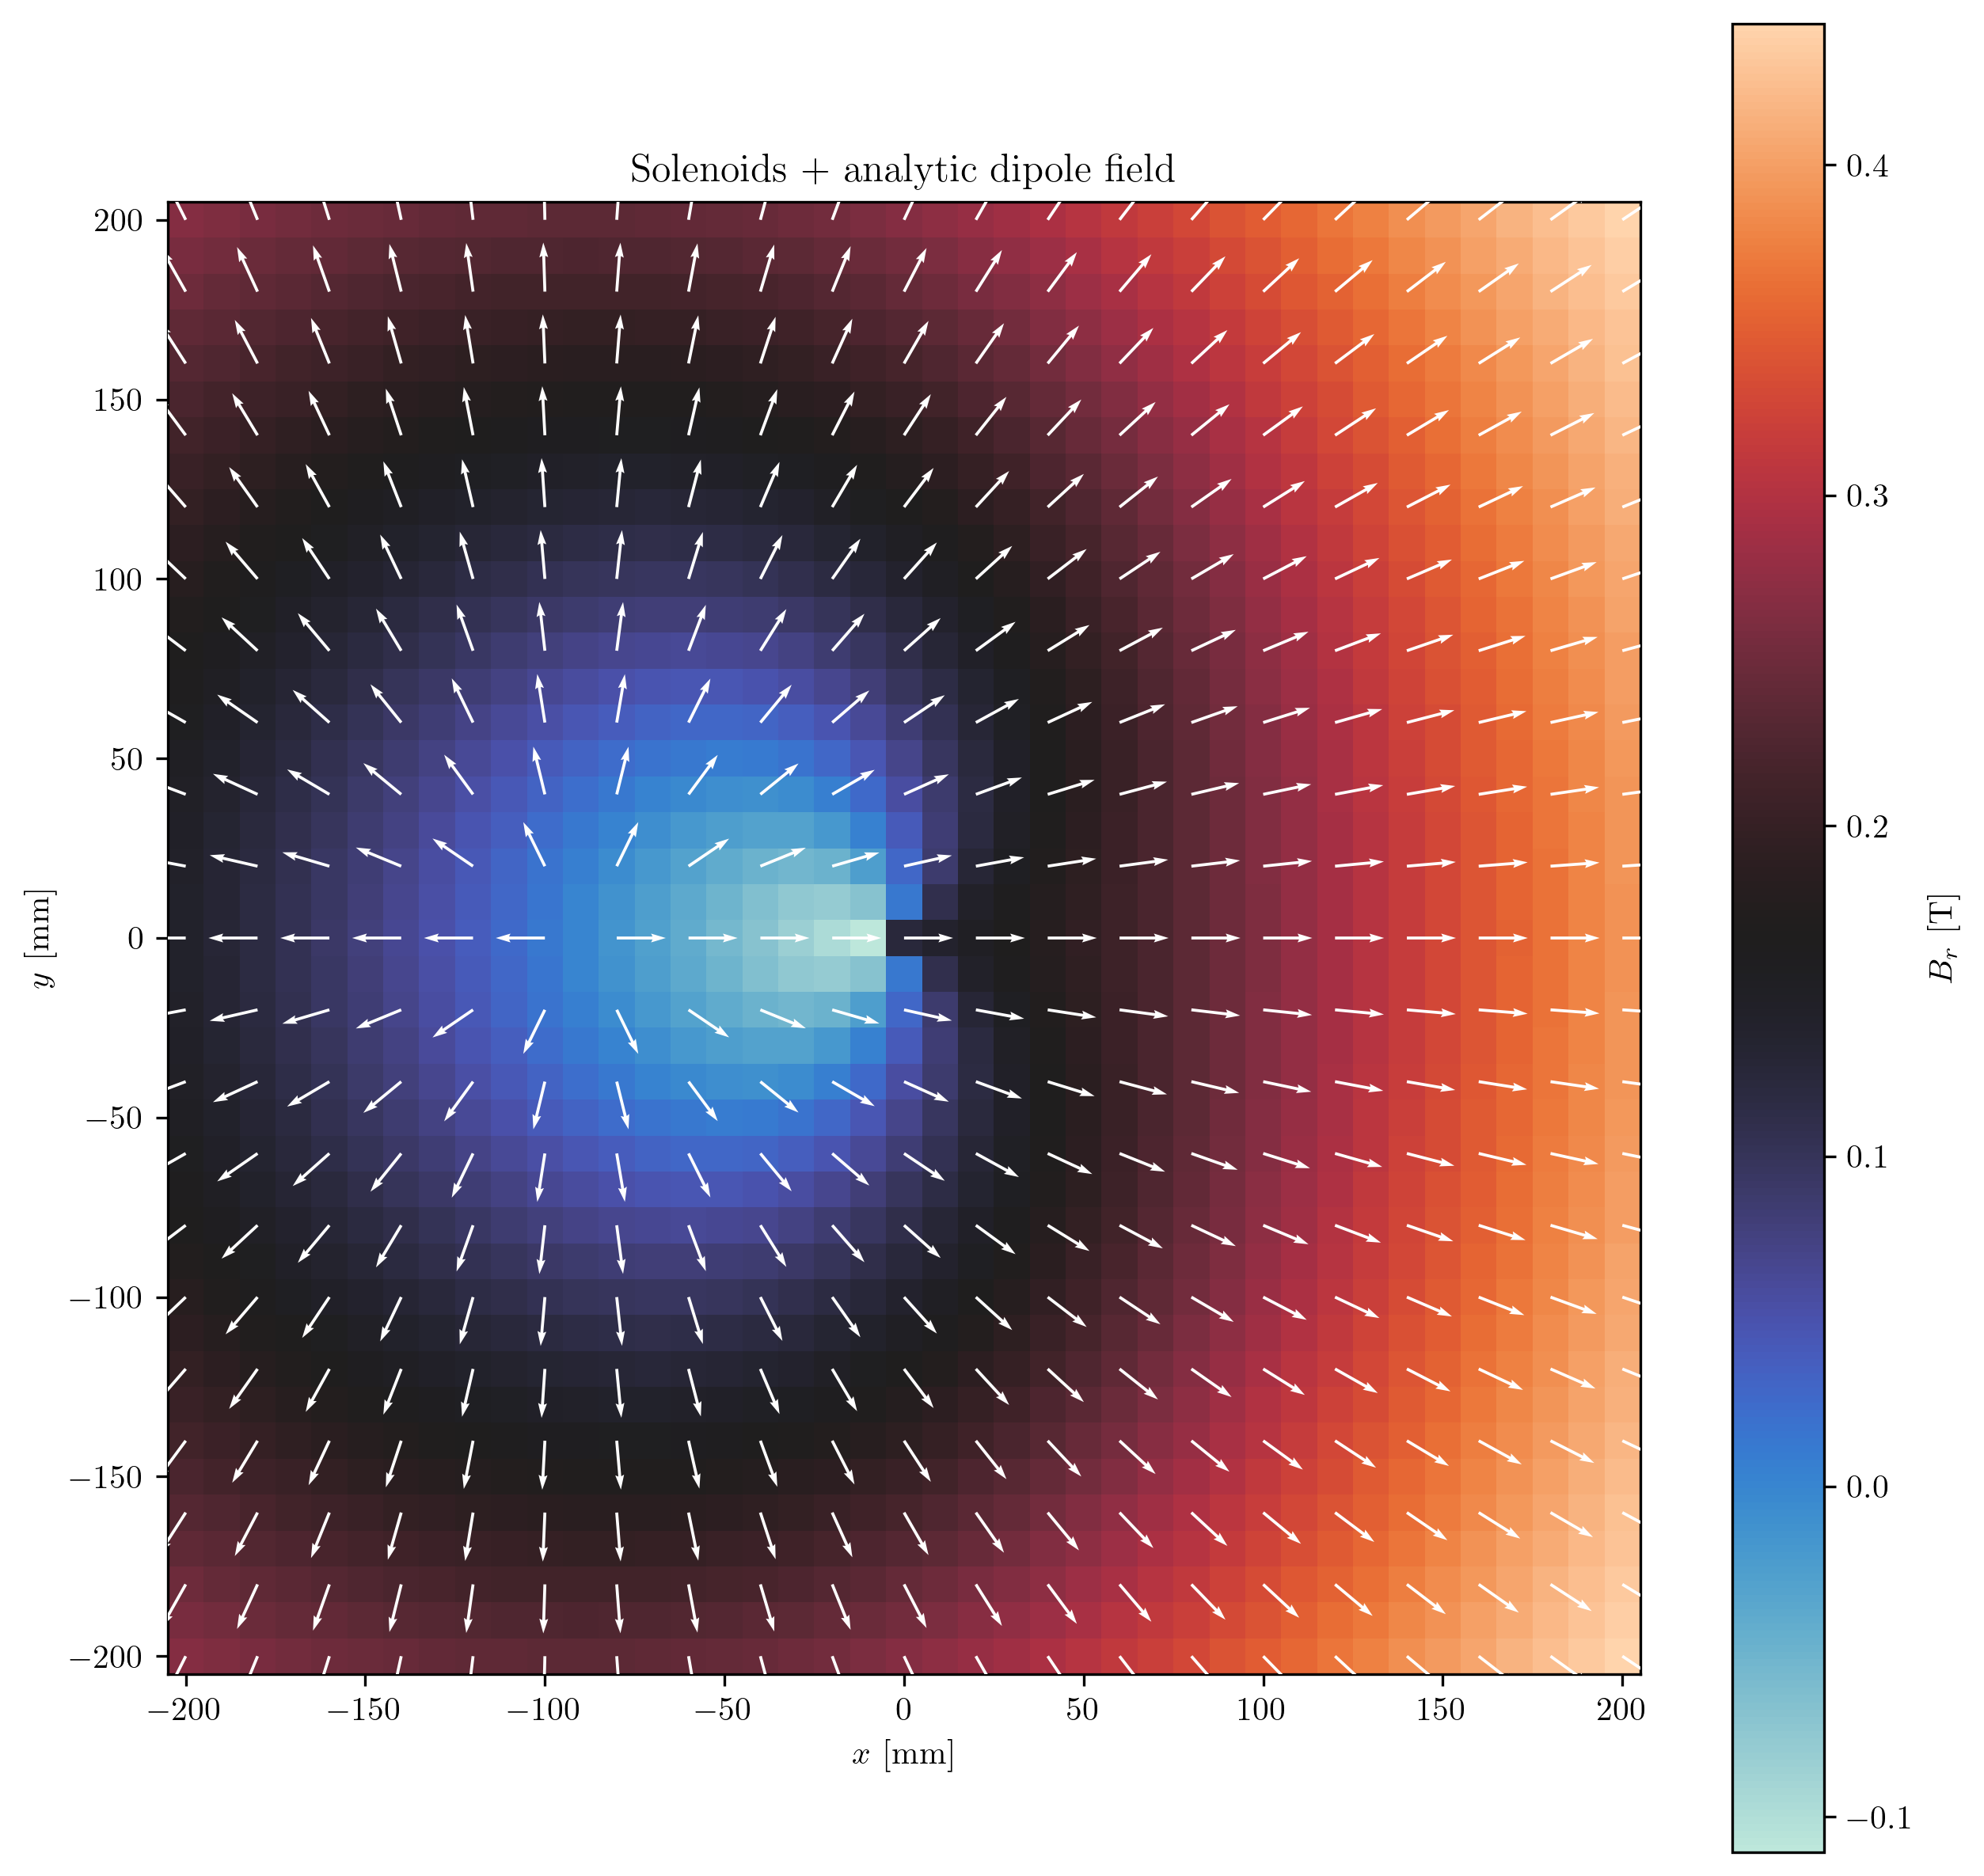

In [19]:
########## B_r QUIVER ANIMATION ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
ax.set_aspect('equal')
plt.title('Solenoids + analytic dipole field')

cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap)
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

quiver_plot = None

step = 2

def animate(frame):
    global quiver_plot

    z_val = unique_z[frame]

    data_slice = data[data['z'] == z_val]

    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values

    X_ds = X[::step, ::step]
    Y_ds = Y[::step, ::step]
    Bx_ds = Bx_grid[::step, ::step]
    By_ds = By_grid[::step, ::step]

    magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
    Bx_norm = Bx_ds / (magnitude + 1e-12)
    By_norm = By_ds / (magnitude + 1e-12)

    pcm.set_array(Br_grid.ravel())

    if quiver_plot:
        quiver_plot.remove()

    quiver_plot = ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

    return [pcm, quiver_plot]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_dipole_solenoids.gif', writer='pillow')

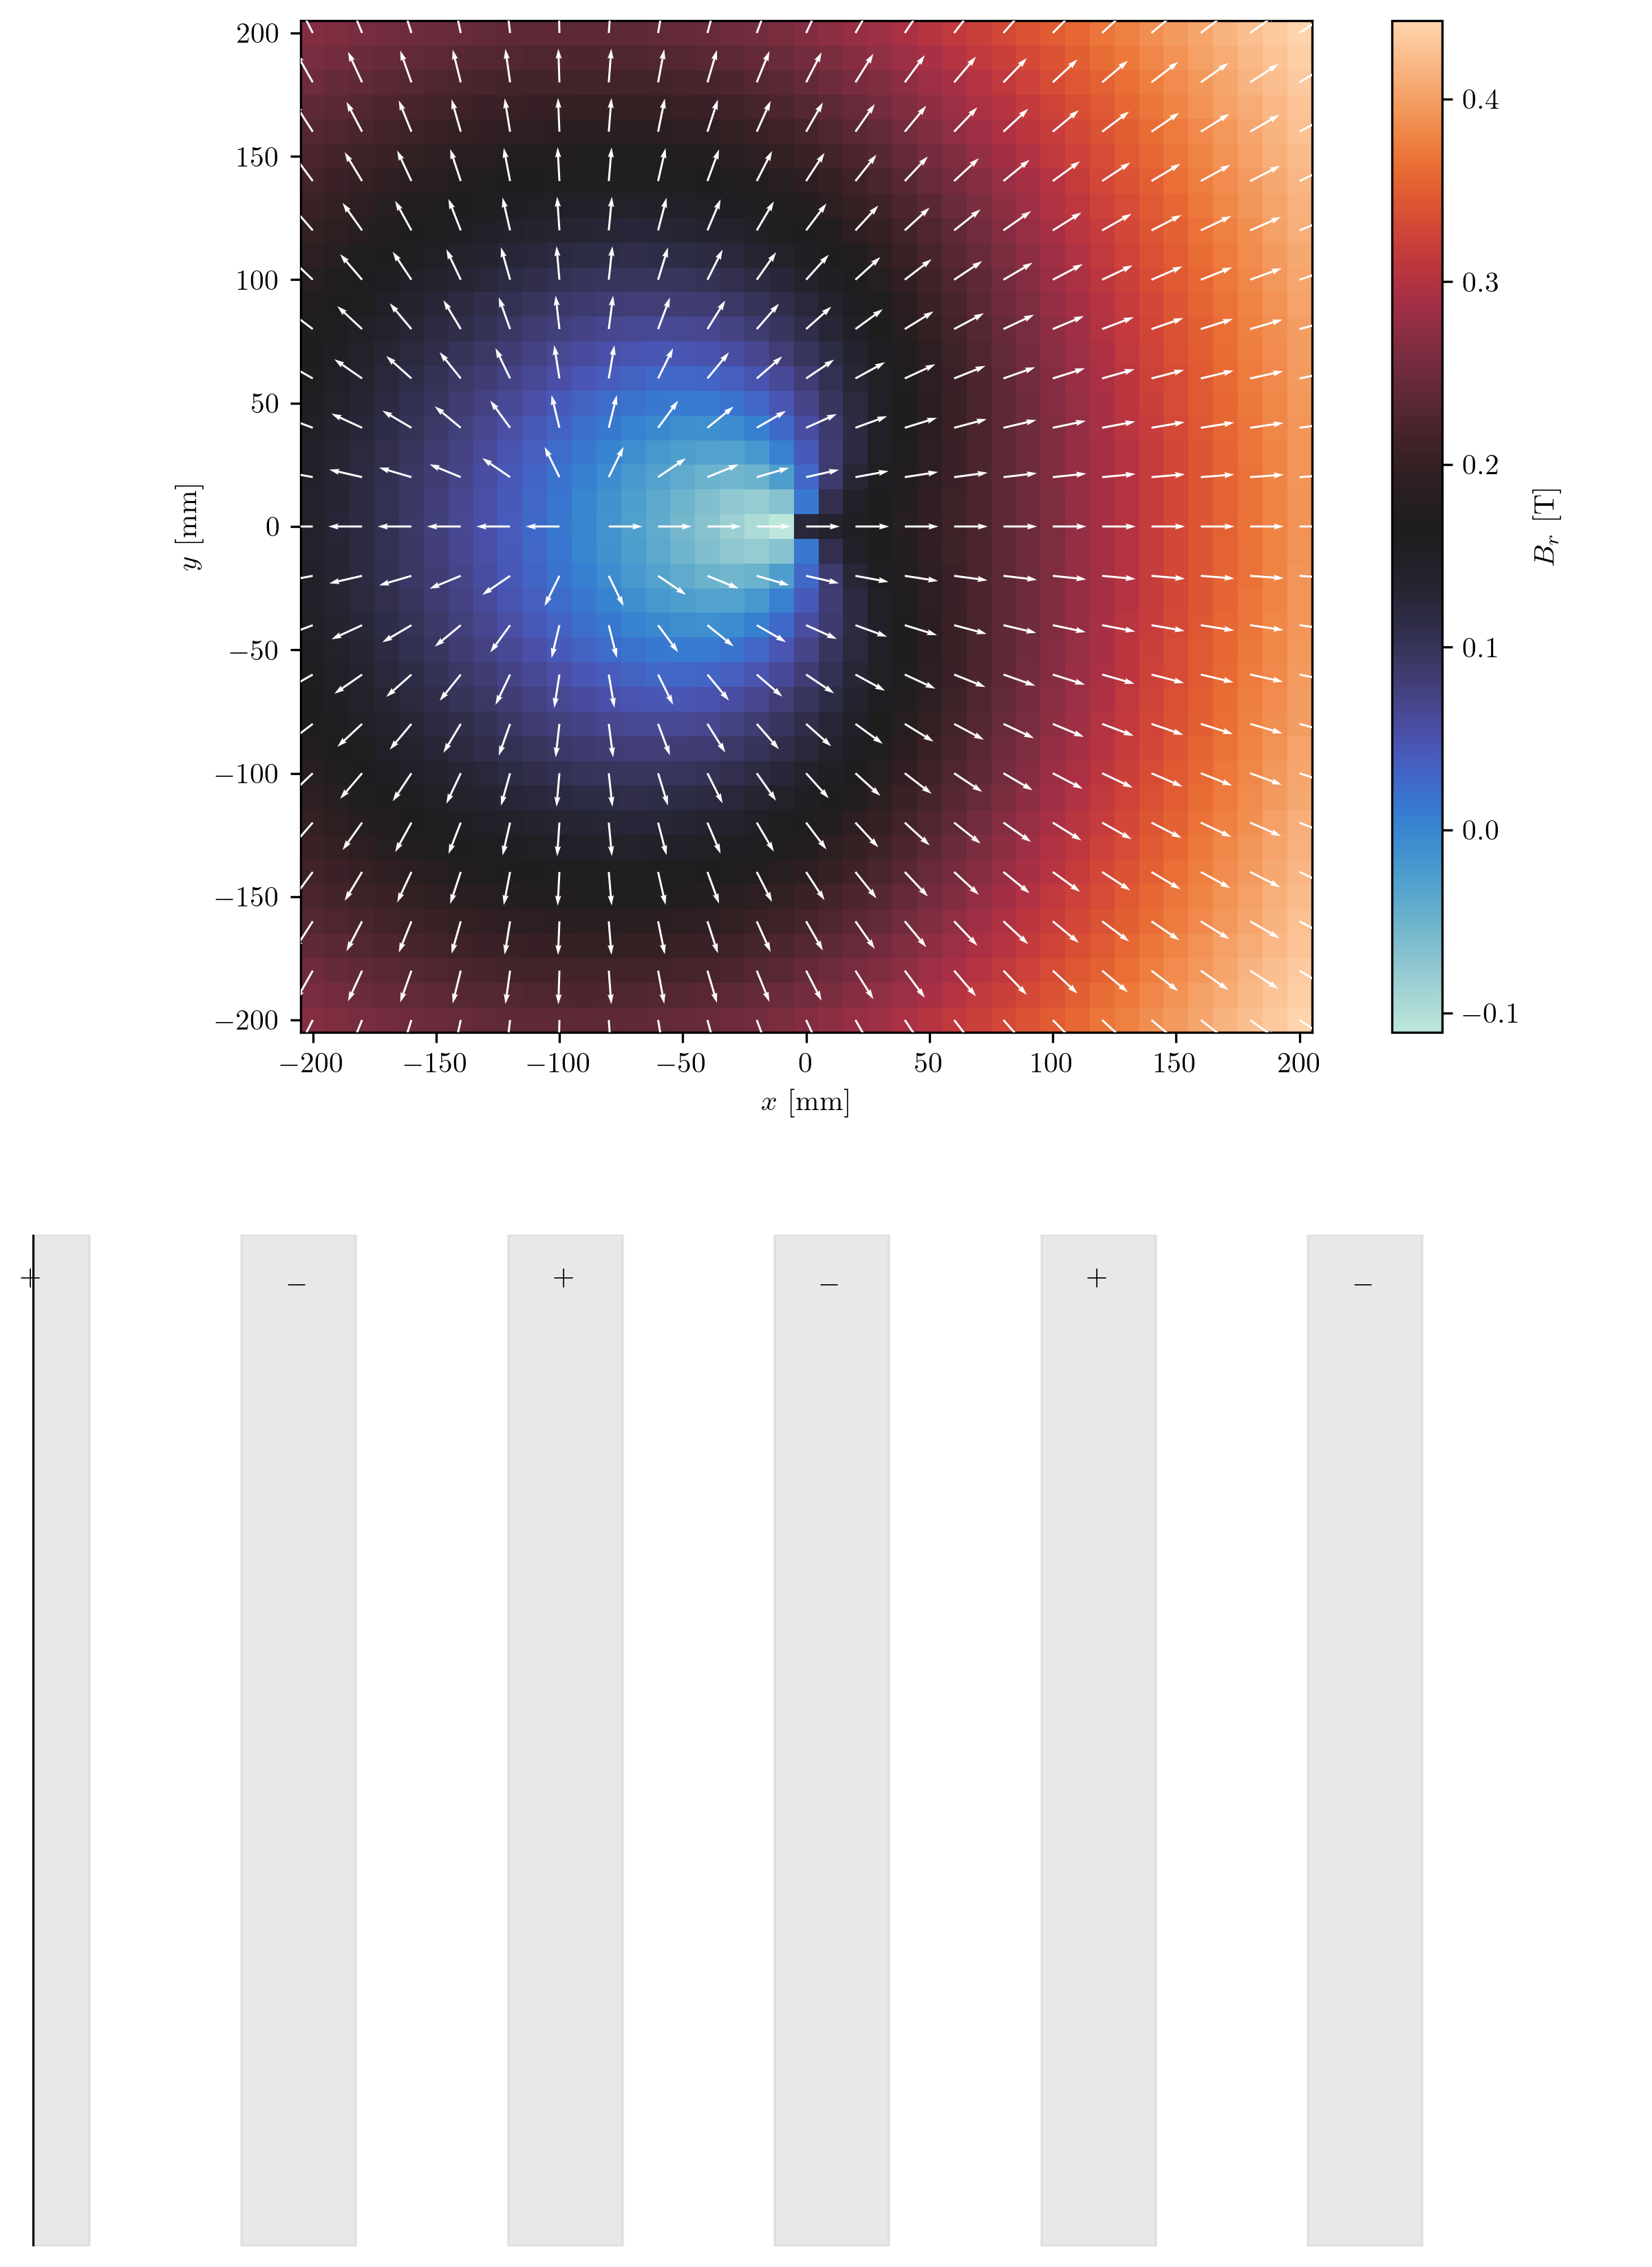

In [20]:
########## B_r QUIVER ANIMATION WITH LATTICE ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, axs = plt.subplots(2, 1, figsize=(10,14))
ax, ax2 = axs[0], axs[1]

arrayy = [0, 0]
ax2.set_xlim(0, 4200)
plot_lattice(ax2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
ax.set_aspect('equal')

cmap = sns.color_palette("icefire", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap)
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

quiver_plot = None

step = 2

def animate(frame):
    global quiver_plot

    z_val = unique_z[frame]
    vline.set_xdata([z_val])

    data_slice = data[data['z'] == z_val]

    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values

    X_ds = X[::step, ::step]
    Y_ds = Y[::step, ::step]
    Bx_ds = Bx_grid[::step, ::step]
    By_ds = By_grid[::step, ::step]

    magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
    Bx_norm = Bx_ds / (magnitude + 1e-12)
    By_norm = By_ds / (magnitude + 1e-12)

    pcm.set_array(Br_grid.ravel())

    if quiver_plot:
        quiver_plot.remove()

    quiver_plot = ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

    return [pcm, vline, quiver_plot]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_dipole_solenoids_lattice.gif', writer='pillow')